<a href="https://colab.research.google.com/github/sandhyajnv/Deep-Learning-/blob/main/MNIST_Digital_classification_Using_Autoencoder_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
import tensorflow as tf
import pickle
from tensorflow.keras.layers import Flatten, Dense, Input
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Trpath="/content/drive/MyDrive/Group_11MNIST/Group_11/train"
#/content/drive/MyDrive/Group_11MNIST/Group_11/train/0
TrClss=['0','4','5','6','7']
TrData=[]
TrLabel=[]
trdic={}
num=0
for i in TrClss:
    path=Trpath+"/"+i
    ClssFile=os.listdir(path)
    trdic[i]=len(ClssFile)

    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"/"+j
        img=plt.imread(filepath)
        TrData.append(img)
        l[num]+=1
        TrLabel.append(l)
    num+=1
TrData=np.array(TrData)
TrLabel=np.array(TrLabel)

In [ ]:
print(trdic)

{'0': 2287, '4': 2277, '5': 2287, '6': 2277, '7': 2277}


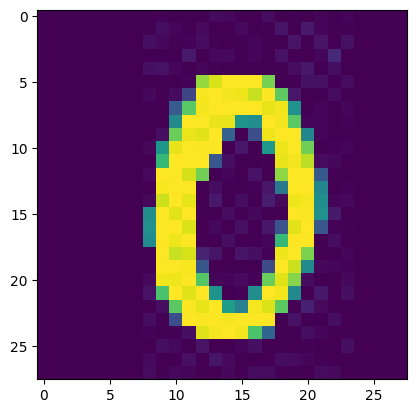

In [ ]:
plt.imshow(TrData[0])

In [ ]:
TrDataF=[]

for i in range(len(TrData)):
  TrDataF.append(TrData[i].flatten())
  

In [ ]:
TrDataF=np.array(TrDataF)
TrDataFlatten=TrDataF.copy()

mean_vector=np.sum(TrDataF,axis=0)/TrDataF.shape[0]

for i in range(TrDataF.shape[0]):
   TrDataF[i,:]=TrDataF[i,:]-mean_vector

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

print(TrDataF.shape)

(11405, 784)


In [ ]:
pca_32=PCA(n_components=32)
pca_32.fit(TrDataF)
TrData_pca_32=pca_32.transform(TrDataF)


pca_64=PCA(n_components=64)
pca_64.fit(TrDataF)
TrData_pca_64=pca_64.transform(TrDataF)

pca_128=PCA(n_components=128)
pca_128.fit(TrDataF)
TrData_pca_128=pca_128.transform(TrDataF)

pca_256=PCA(n_components=256)
pca_256.fit(TrDataF)
TrData_pca_256=pca_256.transform(TrDataF)





In [ ]:
Testpath="/content/drive/MyDrive/Group_11MNIST/Group_11/test"
TestClss=['0','4','5','6','7']

TestData=[]
TestLabel=[]
testdic={}
num=0
for i in TestClss:
    path=Testpath+"/"+i
    ClssFile=os.listdir(path)
    testdic[i]=len(ClssFile)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"/"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        TestData.append(img)
        l[num]+=1
        TestLabel.append(l)
    num+=1
TestData=np.array(TestData)
TestLabel=np.array(TestLabel)

In [ ]:
TestDataF=[]

for i in range(len(TestData)):
  TestDataF.append(TestData[i].flatten())
TestDataF=np.array(TestDataF)
TestDataFlatten=TestDataF.copy()

for i in range(TestDataF.shape[0]):
  TestDataF[i,:]=TestDataF[i,:]-mean_vector

In [ ]:
pca_32=PCA(n_components=32)
pca_32.fit(TestDataF)
TestData_pca_32=pca_32.transform(TestDataF)


pca_64=PCA(n_components=64)
pca_64.fit(TestDataF)
TestData_pca_64=pca_64.transform(TestDataF)

pca_128=PCA(n_components=128)
pca_128.fit(TestDataF)
TestData_pca_128=pca_128.transform(TestDataF)

pca_256=PCA(n_components=256)
pca_256.fit(TestDataF)
TestData_pca_256=pca_256.transform(TestDataF)

In [ ]:
Valpath="/content/drive/MyDrive/Group_11MNIST/Group_11/val"
ValClss=['0','4','5','6','7']
#/content/drive/MyDrive/Group_11MNIST/Group_11/val/0/img_10017.jpg
ValData=[]
ValLabel=[]
valdic={}
num=0
for i in ValClss:
    path=Valpath+"/"+i
   
    ClssFile=os.listdir(path)
    valdic[i]=len(ClssFile)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"/"+j
        

        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        ValData.append(img)
        l[num]+=1
        ValLabel.append(l)
    num+=1
ValData=np.array(ValData)
ValLabel=np.array(ValLabel)

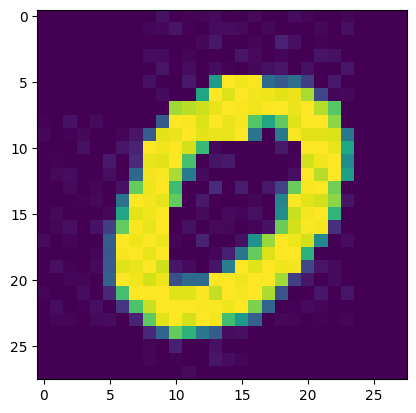

In [ ]:
plt.imshow(ValData[0,:].reshape((28,28)))

In [ ]:
ValDataF=[]

for i in range(len(ValData)):
  ValDataF.append(ValData[i].flatten())
ValDataF=np.array(ValDataF)
ValDataFlatten=ValDataF.copy()
for i in range(ValDataF.shape[0]):
  ValDataF[i,:]=ValDataF[i,:]-mean_vector


In [ ]:
pca_32=PCA(n_components=32)
pca_32.fit(ValDataF)
ValData_pca_32=pca_32.transform(ValDataF)


pca_64=PCA(n_components=64)
pca_64.fit(ValDataF)
ValData_pca_64=pca_64.transform(ValDataF)

pca_128=PCA(n_components=128)
pca_128.fit(ValDataF)
ValData_pca_128=pca_128.transform(ValDataF)

pca_256=PCA(n_components=256)
pca_256.fit(ValDataF)
ValData_pca_256=pca_256.transform(ValDataF)

In [ ]:
model_pca32 = keras.Sequential(
    [
        Input(shape=(32,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [ ]:
model_pca32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               16896     
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 181,765
Trainable params: 181,765
Non-trainable params: 0
_________________________________________________________________


In [ ]:
TrLabel=np.array(TrLabel)
ValLabel=np.array(ValLabel)
print(TrLabel.shape)
print(ValLabel.shape)

(11405, 5)
(3805, 5)


In [ ]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model_pca32.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history_pca32 = model_pca32.fit(x=TrData_pca_32,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_32,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 4s 13ms/step - loss: 1.0463 - accuracy: 0.5852 - val_loss: 1.4145 - val_accuracy: 0.5369
Epoch 2/10000
229/229 [==============================] - 3s 13ms/step - loss: 0.8720 - accuracy: 0.6590 - val_loss: 1.4596 - val_accuracy: 0.5225
Epoch 3/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.8035 - accuracy: 0.6857 - val_loss: 1.5328 - val_accuracy: 0.5214
Epoch 4/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.7516 - accuracy: 0.7046 - val_loss: 1.6114 - val_accuracy: 0.5104
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.7118 - accuracy: 0.7242 - val_loss: 1.6135 - val_accuracy: 0.5206
Epoch 6/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.6886 - accuracy: 0.7327 - val_loss: 1.6940 - val_accuracy: 0.5167
Epoch 7/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.6441 - accuracy: 0.7530 - val_loss: 1.7597 - val_

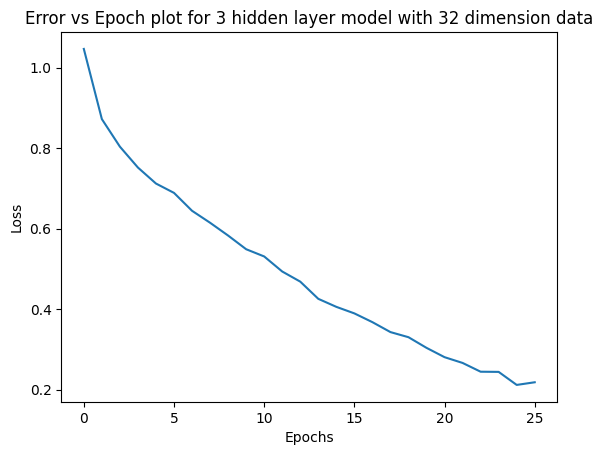

In [ ]:
loss=history_pca32 .history['loss']
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model with 32 dimension data")
plt.show()

In [ ]:
model_pca32.evaluate(x=ValData_pca_32, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 0s 2ms/step - loss: 2.9953 - accuracy: 0.4704


[2.9953012466430664, 0.47043365240097046]

In [ ]:
model_pca64 = keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

model_pca64.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [ ]:
history_pca64 = model_pca64.fit(x=TrData_pca_64,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_64,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 10ms/step - loss: 0.9818 - accuracy: 0.6200 - val_loss: 1.4501 - val_accuracy: 0.4896
Epoch 2/10000
229/229 [==============================] - 3s 13ms/step - loss: 0.7530 - accuracy: 0.7135 - val_loss: 1.5950 - val_accuracy: 0.4812
Epoch 3/10000
229/229 [==============================] - 3s 13ms/step - loss: 0.6744 - accuracy: 0.7462 - val_loss: 1.6508 - val_accuracy: 0.4878
Epoch 4/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.6189 - accuracy: 0.7701 - val_loss: 1.7634 - val_accuracy: 0.4823
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.5660 - accuracy: 0.7915 - val_loss: 1.8456 - val_accuracy: 0.4723
Epoch 6/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.5329 - accuracy: 0.8025 - val_loss: 1.9359 - val_accuracy: 0.4612
Epoch 7/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.4803 - accuracy: 0.8218 - val_loss: 2.0835 - val

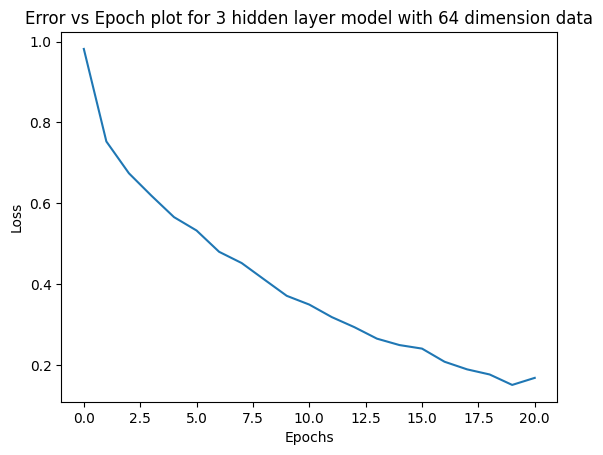

119/119 [==============================] - 1s 4ms/step - loss: 3.2592 - accuracy: 0.4465


[3.2592051029205322, 0.4465177357196808]

In [ ]:
loss=history_pca64 .history['loss']
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model with 64 dimension data")
plt.show()
model_pca64.evaluate(x=ValData_pca_64, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

In [ ]:
model_pca64.evaluate(x=ValData_pca_64, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 4ms/step - loss: 3.2592 - accuracy: 0.4465


[3.2592051029205322, 0.4465177357196808]

Epoch 1/10000
229/229 [==============================] - 4s 10ms/step - loss: 0.9206 - accuracy: 0.6568 - val_loss: 1.6314 - val_accuracy: 0.4447
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.5598 - accuracy: 0.7995 - val_loss: 1.8981 - val_accuracy: 0.4126
Epoch 3/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.4607 - accuracy: 0.8365 - val_loss: 2.0214 - val_accuracy: 0.4118
Epoch 4/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.4018 - accuracy: 0.8600 - val_loss: 2.2043 - val_accuracy: 0.4102
Epoch 5/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.3560 - accuracy: 0.8787 - val_loss: 2.3472 - val_accuracy: 0.3989
Epoch 6/10000
229/229 [==============================] - 4s 16ms/step - loss: 0.3094 - accuracy: 0.8932 - val_loss: 2.4478 - val_accuracy: 0.4152
Epoch 7/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2746 - accuracy: 0.9100 - val_loss: 2.5600 - val

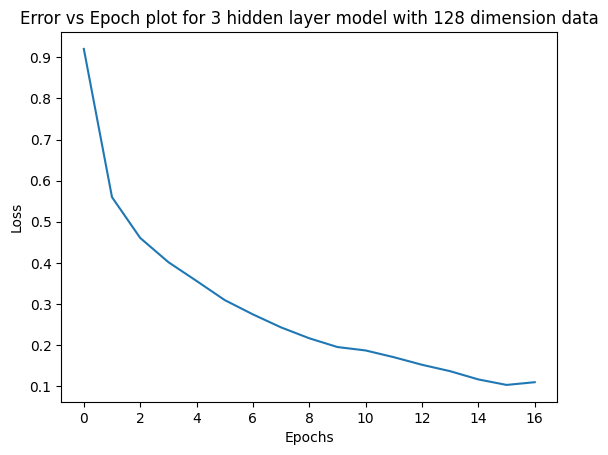

119/119 [==============================] - 0s 4ms/step - loss: 3.6430 - accuracy: 0.3982


[3.642967462539673, 0.39816030859947205]

In [ ]:
model_pca128 = keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

model_pca128.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_pca128 = model_pca128.fit(x=TrData_pca_128,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_128,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
loss=history_pca128 .history['loss']
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model with 128 dimension data")
plt.show()
model_pca128.evaluate(x=ValData_pca_128, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

Epoch 1/10000
229/229 [==============================] - 4s 12ms/step - loss: 0.8283 - accuracy: 0.6895 - val_loss: 2.0375 - val_accuracy: 0.4139
Epoch 2/10000
229/229 [==============================] - 2s 11ms/step - loss: 0.3789 - accuracy: 0.8690 - val_loss: 2.3897 - val_accuracy: 0.3861
Epoch 3/10000
229/229 [==============================] - 3s 11ms/step - loss: 0.3002 - accuracy: 0.8973 - val_loss: 2.5972 - val_accuracy: 0.3811
Epoch 4/10000
229/229 [==============================] - 3s 12ms/step - loss: 0.2469 - accuracy: 0.9177 - val_loss: 2.9087 - val_accuracy: 0.3666
Epoch 5/10000
229/229 [==============================] - 3s 14ms/step - loss: 0.2045 - accuracy: 0.9353 - val_loss: 3.0847 - val_accuracy: 0.3853
Epoch 6/10000
229/229 [==============================] - 3s 11ms/step - loss: 0.1703 - accuracy: 0.9455 - val_loss: 3.2150 - val_accuracy: 0.3829
Epoch 7/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1572 - accuracy: 0.9503 - val_loss: 3.3298 -

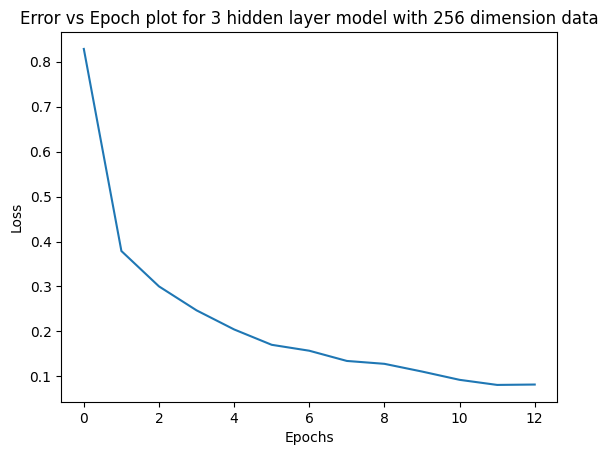

119/119 [==============================] - 0s 3ms/step - loss: 4.2133 - accuracy: 0.3619


[4.213347911834717, 0.3618922531604767]

In [ ]:
model_pca256 = keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(256, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

model_pca256.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_pca256 = model_pca256.fit(x=TrData_pca_256,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_256,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
loss=history_pca256 .history['loss']
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model with 256 dimension data")
plt.show()
model_pca256.evaluate(x=ValData_pca_256, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

In [ ]:
def AvgReconstructionError(l1,l2):
  return(np.mean((l1-l2)**2))

In [ ]:
encoder_input1L_64=keras.Input(shape=(784,),name="inputimg")
encoder_output1L_64=keras.layers.Dense(64,activation="sigmoid")(encoder_input1L_64)
encoder1L_64=keras.Model(encoder_input1L_64,encoder_output1L_64,name="encoder")
decoder_output1L_64=keras.layers.Dense(784,activation="sigmoid")(encoder_output1L_64)
autoencoder1L_64=keras.Model(encoder_input1L_64,decoder_output1L_64,name="autoencoder")

In [ ]:
autoencoder1L_64.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputimg (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]

autoencoder1L_64.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [ ]:
history_autoencoder1L_64 = autoencoder1L_64.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=10,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10
229/229 [==============================] - 3s 9ms/step - loss: 0.0785 - accuracy: 1.7536e-04 - val_loss: 0.0666 - val_accuracy: 0.0000e+00
Epoch 2/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0650 - accuracy: 9.6449e-04 - val_loss: 0.0625 - val_accuracy: 0.0034
Epoch 3/10
229/229 [==============================] - 3s 11ms/step - loss: 0.0585 - accuracy: 5.2609e-04 - val_loss: 0.0547 - val_accuracy: 2.6281e-04
Epoch 4/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.0012 - val_loss: 0.0482 - val_accuracy: 0.0013
Epoch 5/10
229/229 [==============================] - 1s 5ms/step - loss: 0.0456 - accuracy: 0.0018 - val_loss: 0.0435 - val_accuracy: 7.8844e-04
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0416 - accuracy: 0.0021 - val_loss: 0.0402 - val_accuracy: 0.0013
Epoch 7/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0387 - accuracy: 0.0025 - val_loss: 0.0377 - va

In [ ]:
predicted_Autoencoder1L_64_Test=autoencoder1L_64.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_64_Tr=autoencoder1L_64.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_64_Val=autoencoder1L_64.predict(ValDataFlatten/255.0)


119/119 [==============================] - 0s 3ms/step


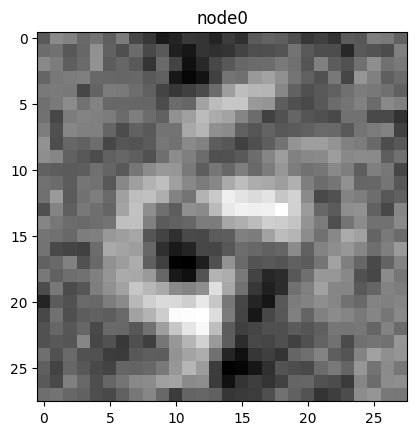

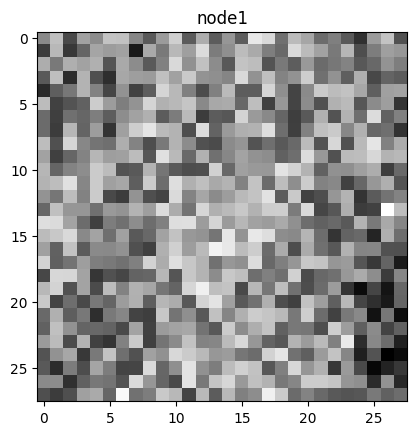

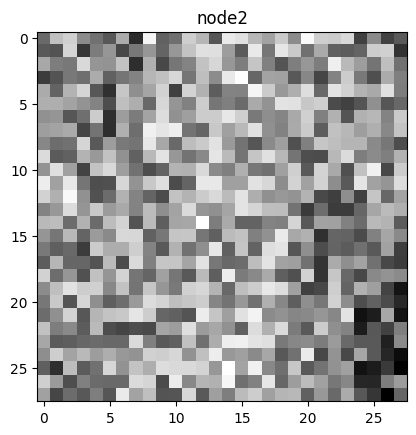

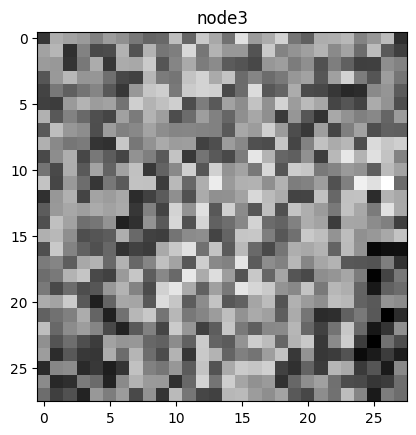

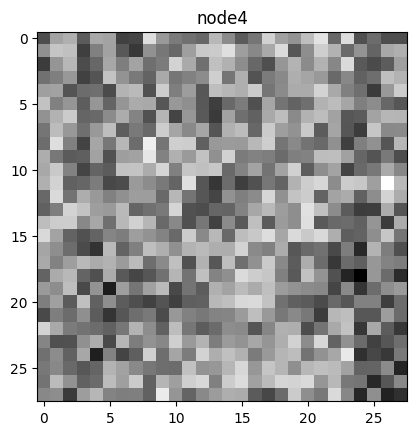

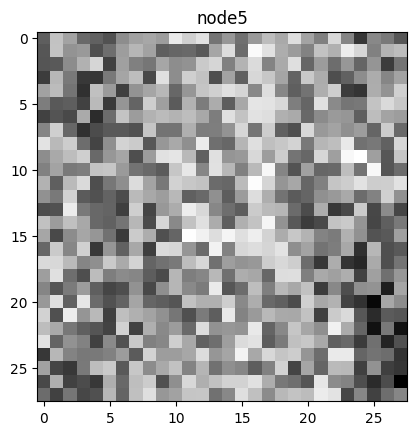

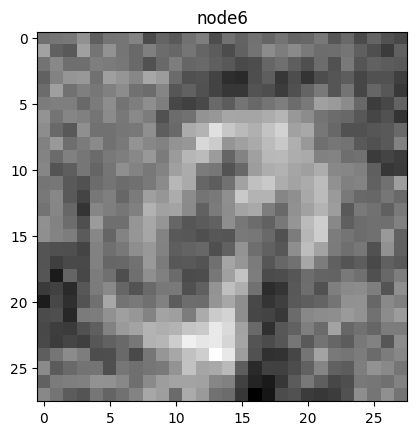

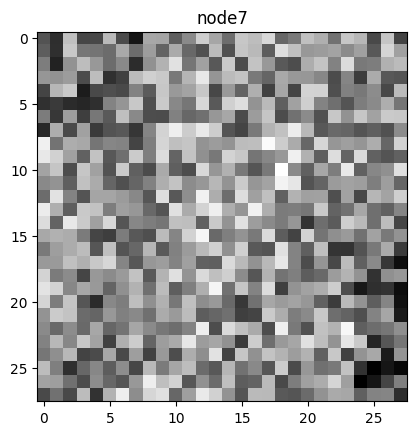

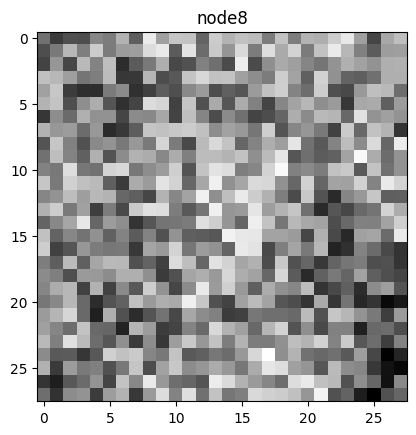

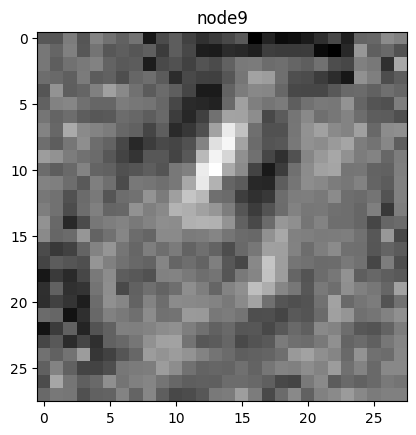

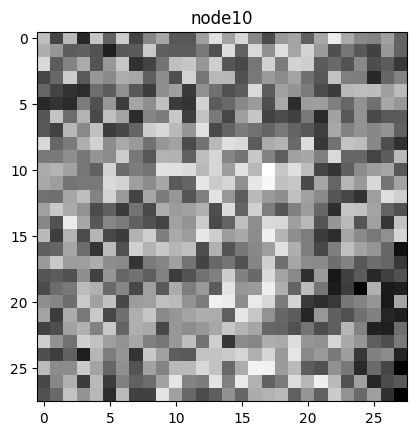

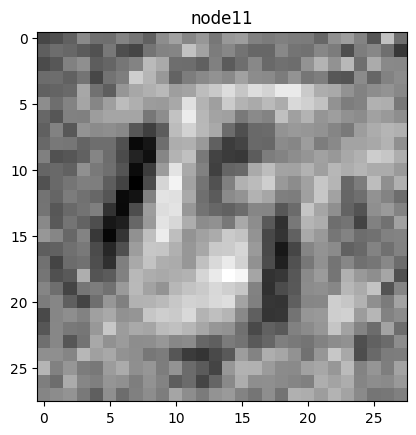

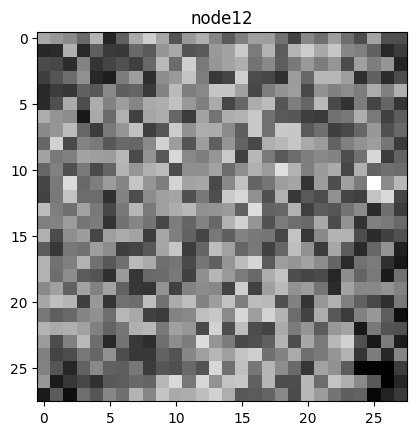

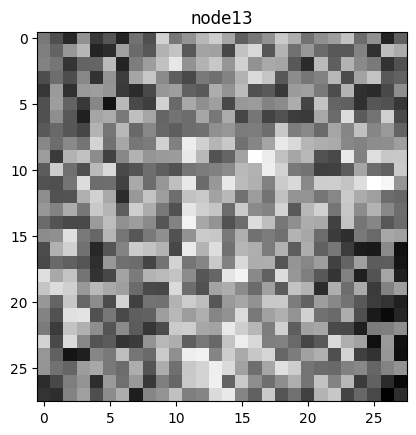

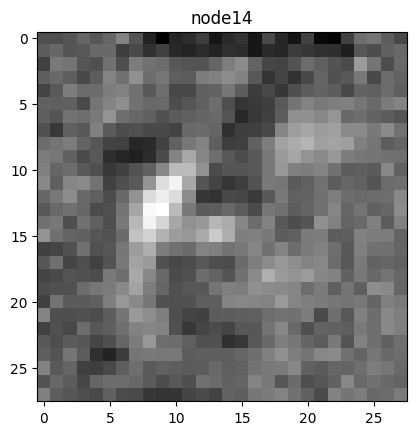

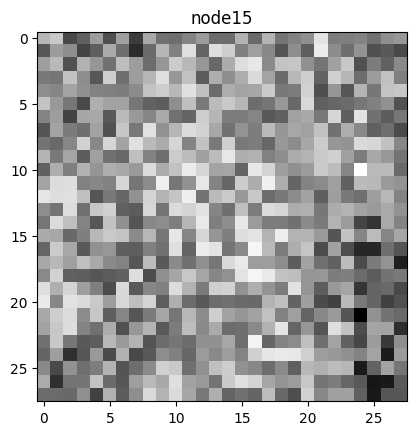

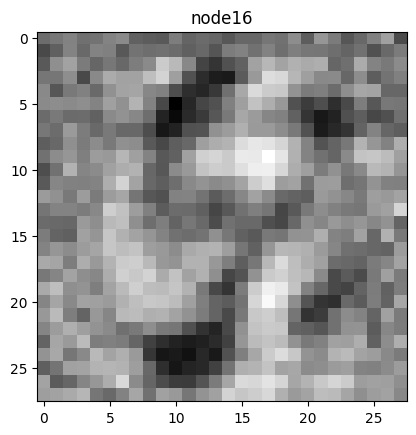

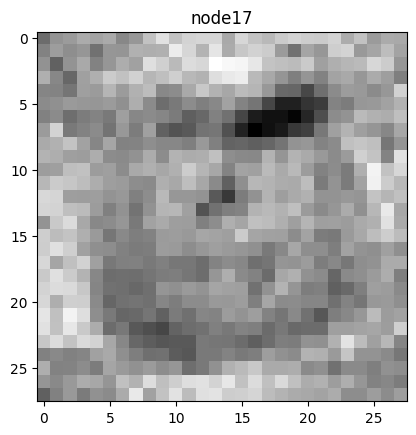

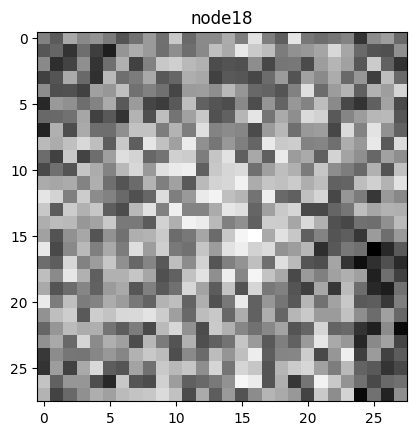

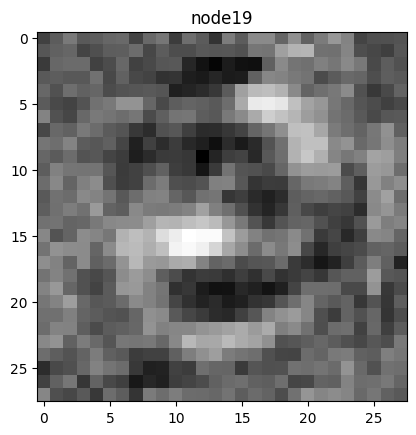

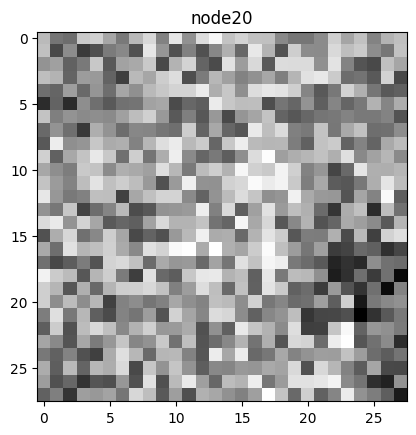

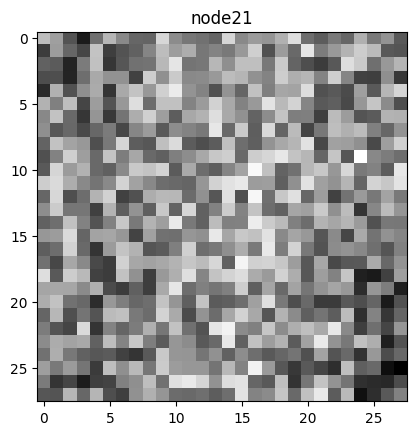

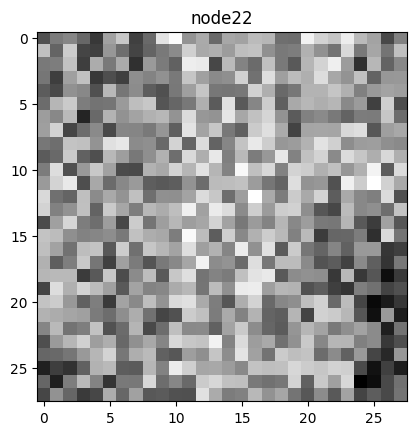

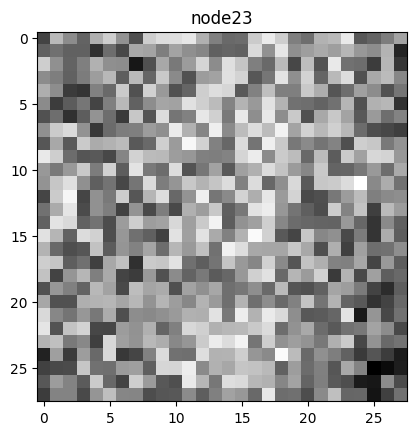

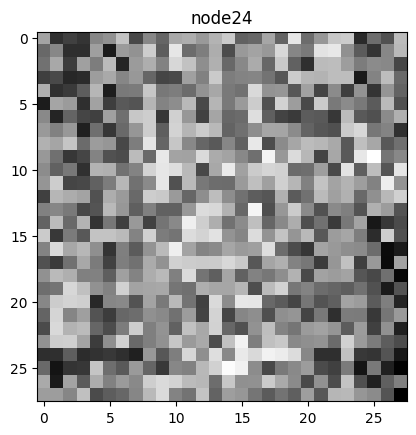

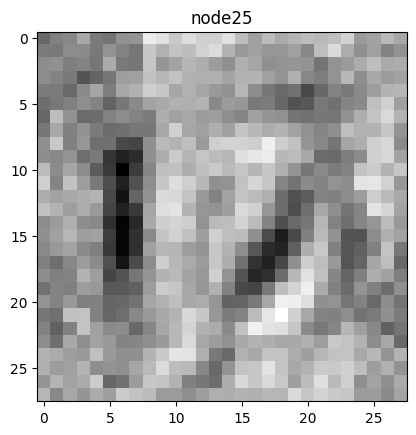

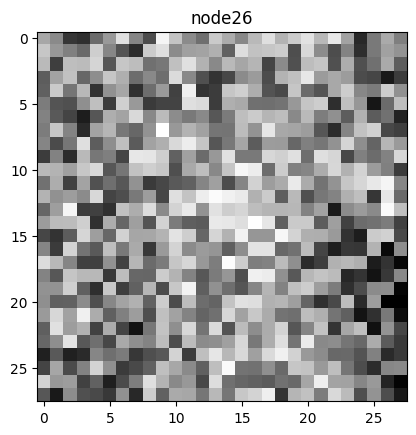

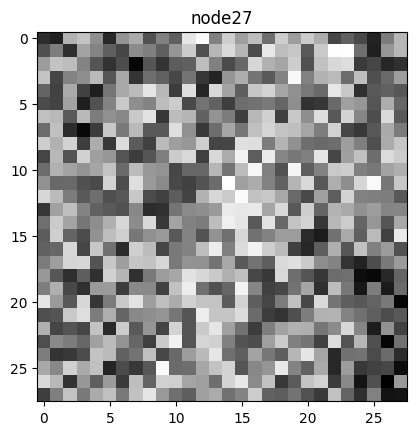

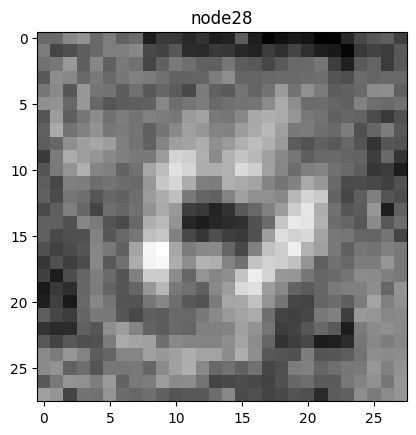

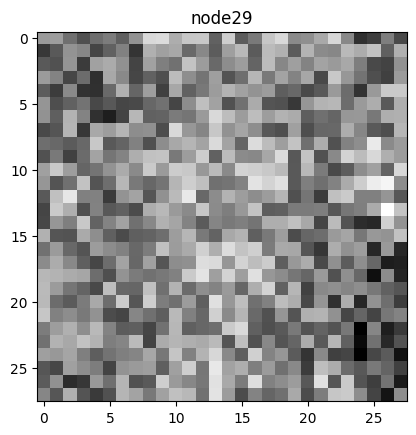

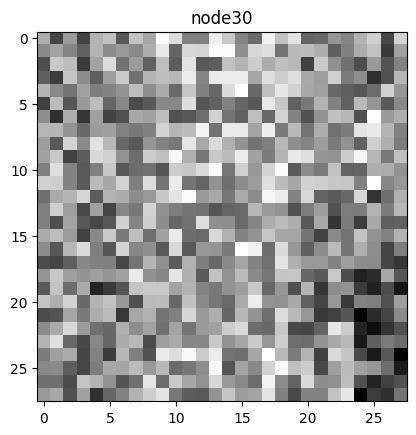

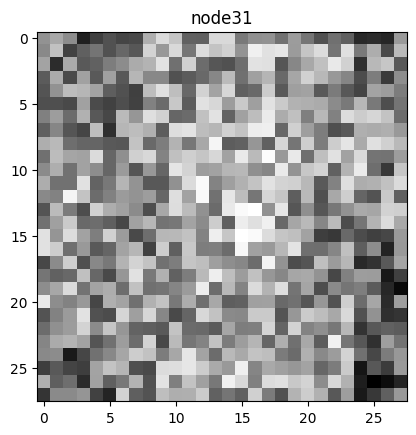

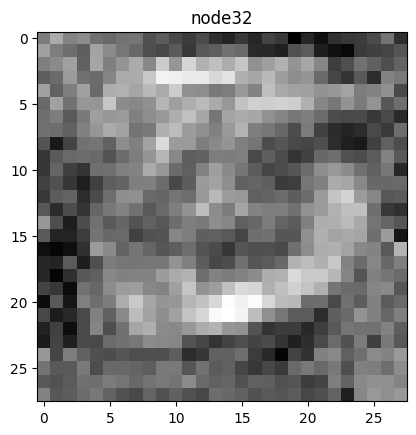

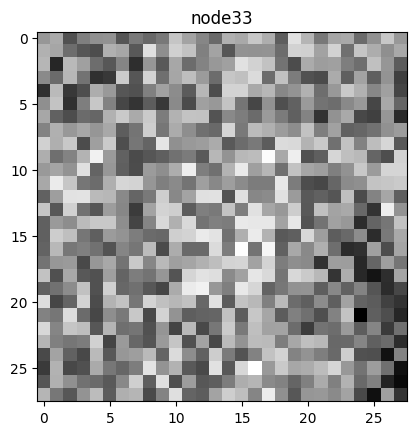

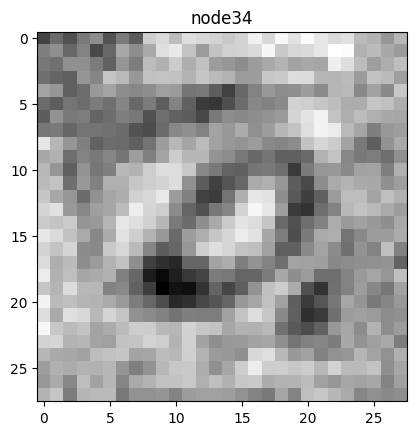

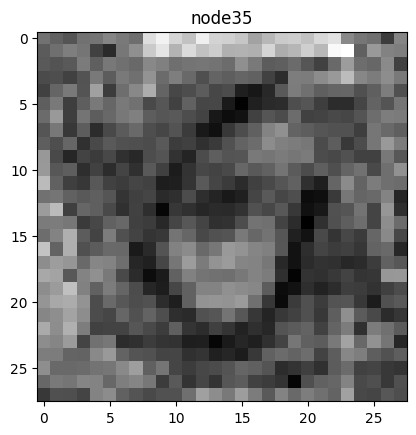

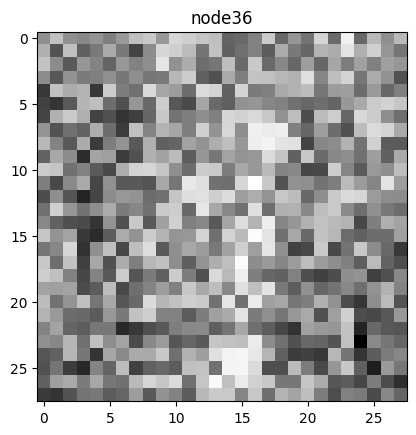

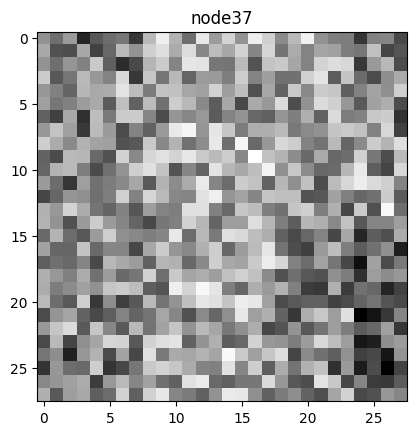

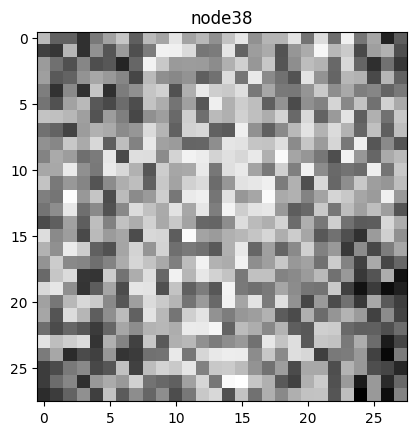

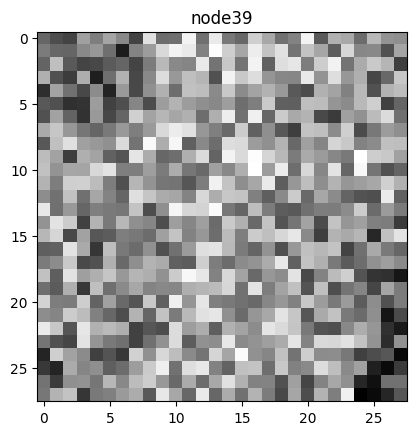

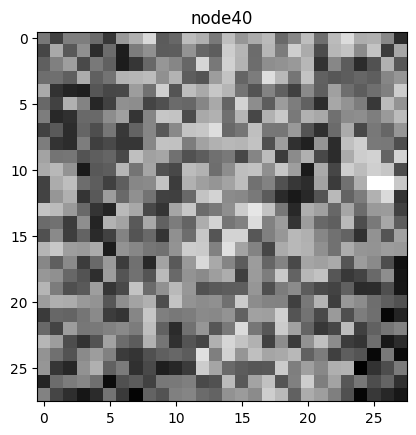

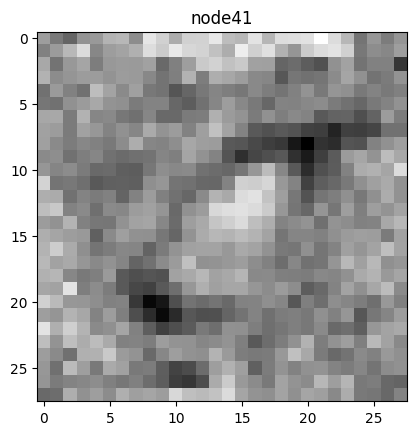

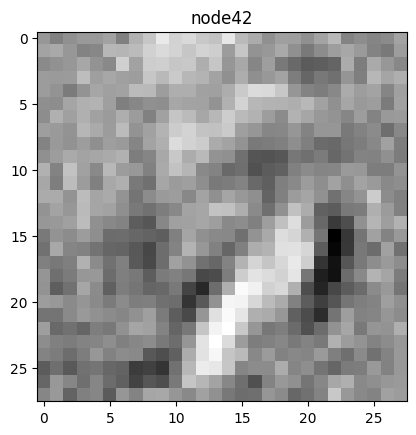

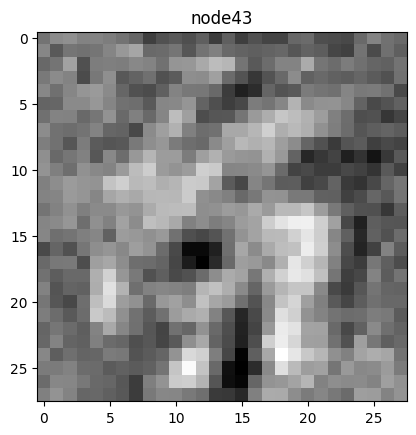

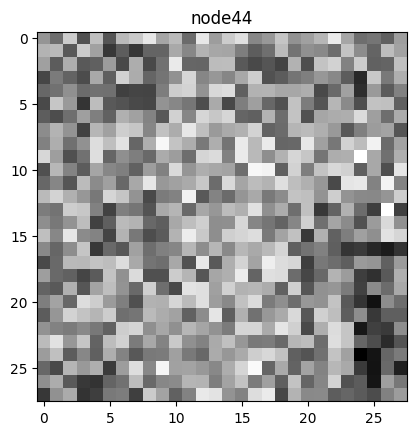

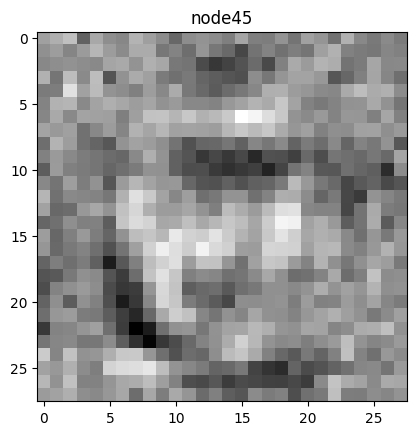

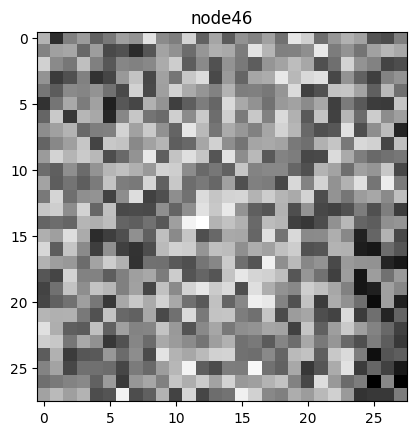

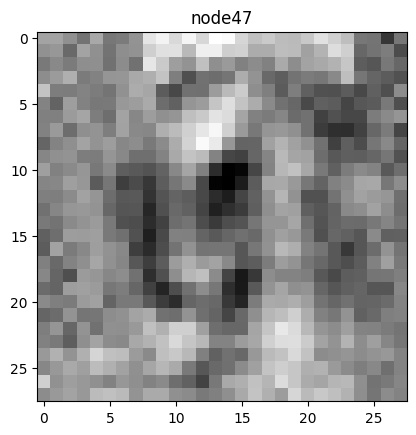

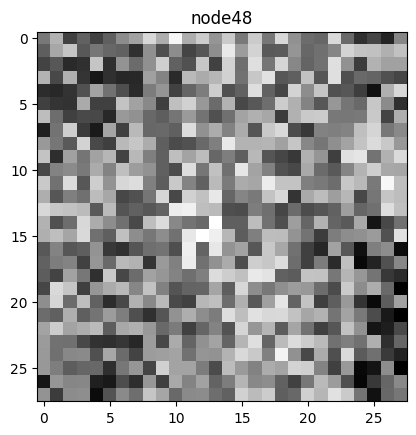

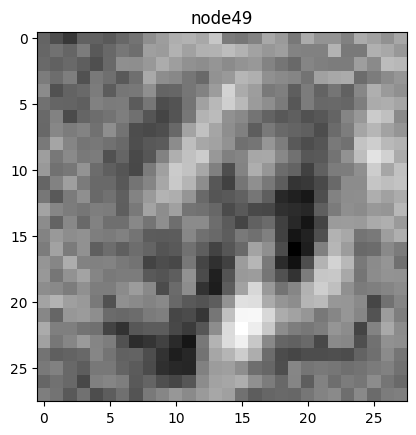

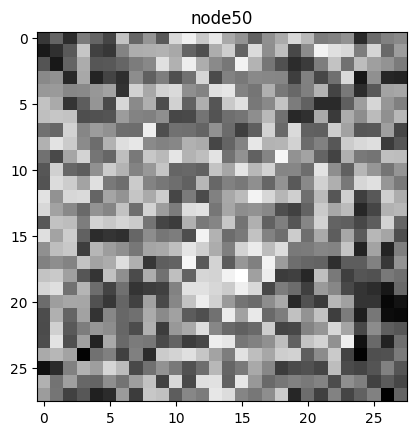

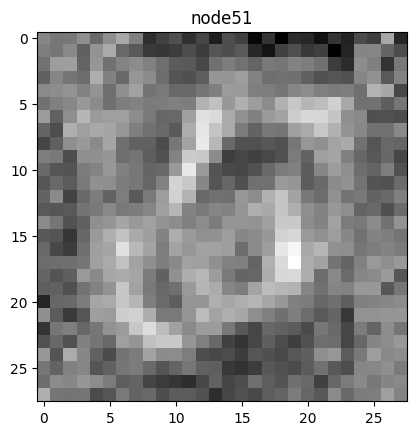

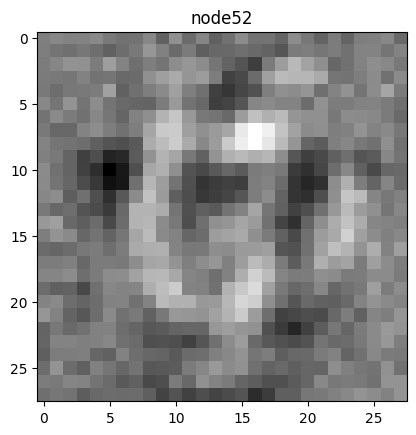

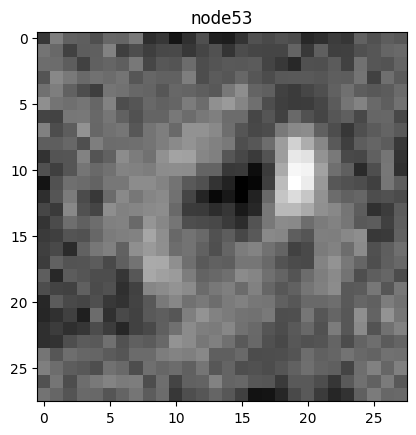

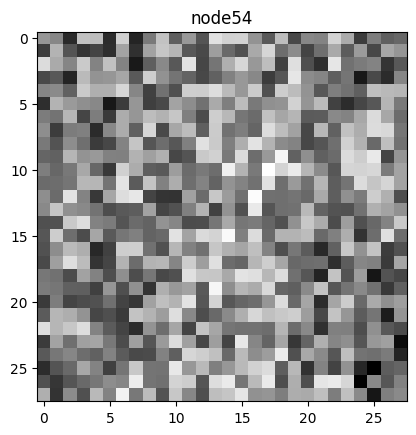

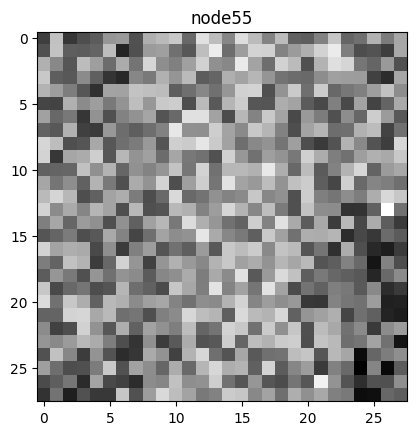

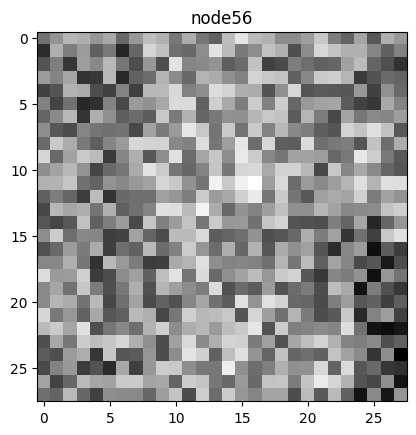

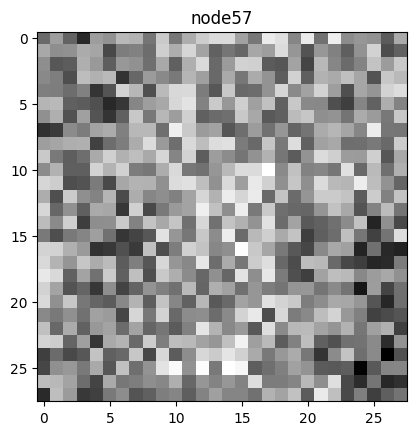

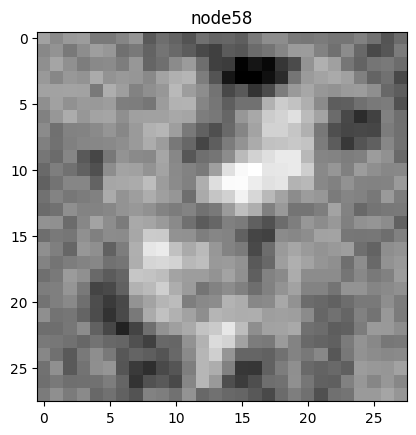

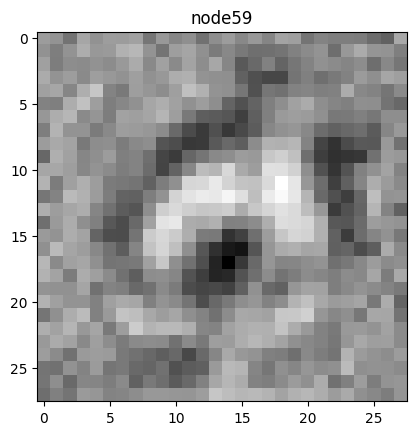

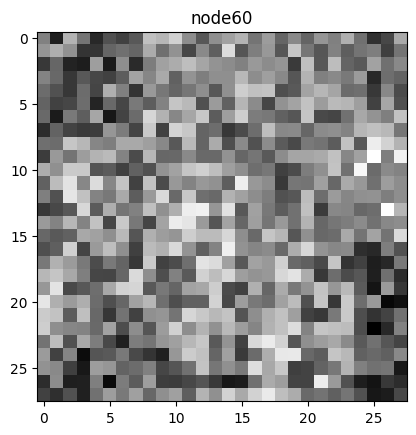

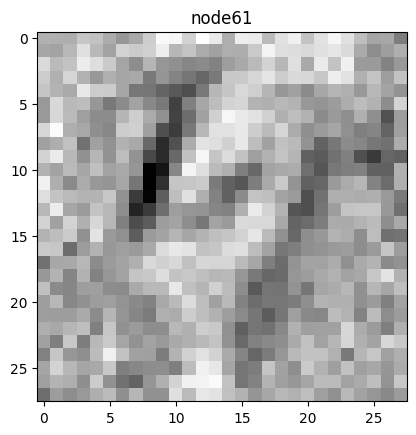

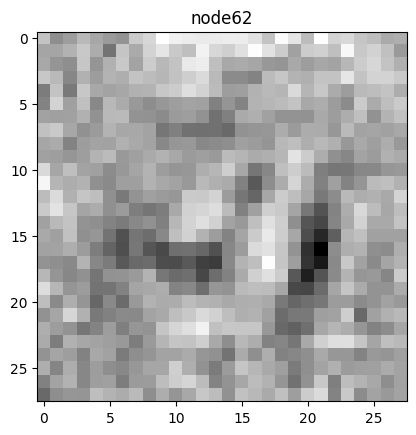

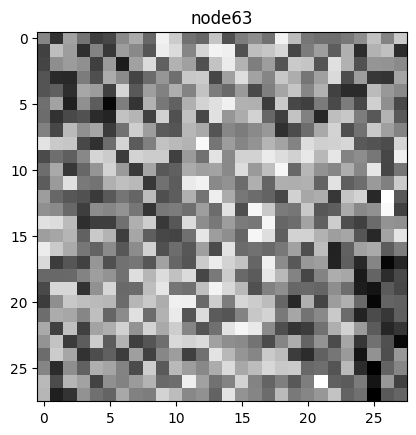

In [ ]:
W1=autoencoder1L_64.get_weights()[0].T
for i in range(W1.shape[0]):
  plt.title("node{}".format(i))
  plt.imshow(W1[i,:].reshape((28,28)),cmap="gray")
  plt.show()

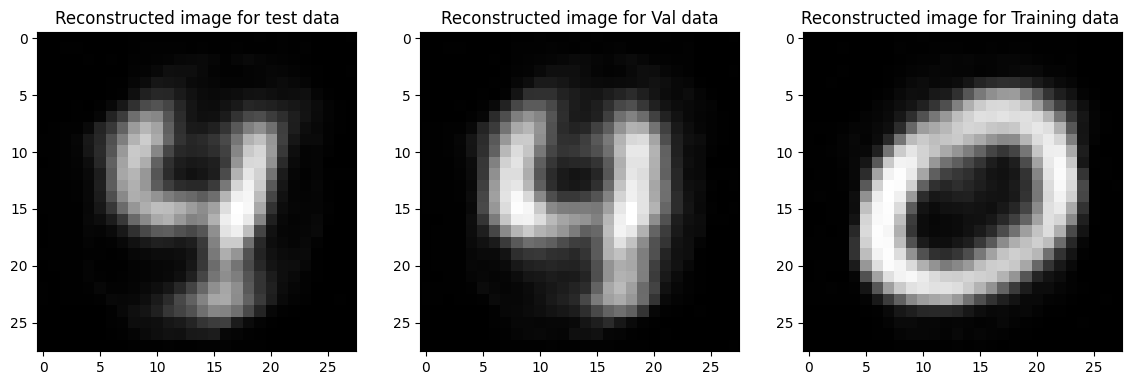

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data")

plt.imshow(predicted_Autoencoder1L_64_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data")

plt.imshow(predicted_Autoencoder1L_64_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data ")

plt.imshow(predicted_Autoencoder1L_64_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
predicted_encoder1L=encoder1L_64.predict(TestDataFlatten/255.0)
print(predicted_encoder1L.shape)

119/119 [==============================] - 0s 2ms/step
(3805, 64)


In [ ]:
encoder_input1L_32=keras.Input(shape=(784,),name="inputimg")
encoder_output1L_32=keras.layers.Dense(32,activation="sigmoid")(encoder_input1L_32)
encoder1L_32=keras.Model(encoder_input1L_32,encoder_output1L_32,name="encoder")
decoder_output1L_32=keras.layers.Dense(784,activation="sigmoid")(encoder_output1L_32)
autoencoder1L_32=keras.Model(encoder_input1L_32,decoder_output1L_32,name="autoencoder")

opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]
autoencoder1L_32.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

history_autoencoder1L_32 = autoencoder1L_32.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=10,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10
229/229 [==============================] - 2s 6ms/step - loss: 0.0873 - accuracy: 4.3840e-04 - val_loss: 0.0678 - val_accuracy: 0.0024
Epoch 2/10
229/229 [==============================] - 1s 5ms/step - loss: 0.0671 - accuracy: 7.0145e-04 - val_loss: 0.0669 - val_accuracy: 0.0024
Epoch 3/10
229/229 [==============================] - 1s 5ms/step - loss: 0.0667 - accuracy: 7.0145e-04 - val_loss: 0.0668 - val_accuracy: 0.0000e+00
Epoch 4/10
229/229 [==============================] - 1s 5ms/step - loss: 0.0665 - accuracy: 9.6449e-04 - val_loss: 0.0667 - val_accuracy: 0.0000e+00
Epoch 5/10
229/229 [==============================] - 1s 6ms/step - loss: 0.0665 - accuracy: 6.1377e-04 - val_loss: 0.0666 - val_accuracy: 0.0039
Epoch 6/10
229/229 [==============================] - 2s 7ms/step - loss: 0.0664 - accuracy: 7.0145e-04 - val_loss: 0.0666 - val_accuracy: 0.0000e+00
Epoch 7/10
229/229 [==============================] - 2s 8ms/step - loss: 0.0664 - accuracy: 0.0011 - val_loss: 

In [ ]:
predicted_Autoencoder1L_32_Test=autoencoder1L_32.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_32_Tr=autoencoder1L_32.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_32_Val=autoencoder1L_32.predict(ValDataFlatten/255.0)

119/119 [==============================] - 0s 2ms/step


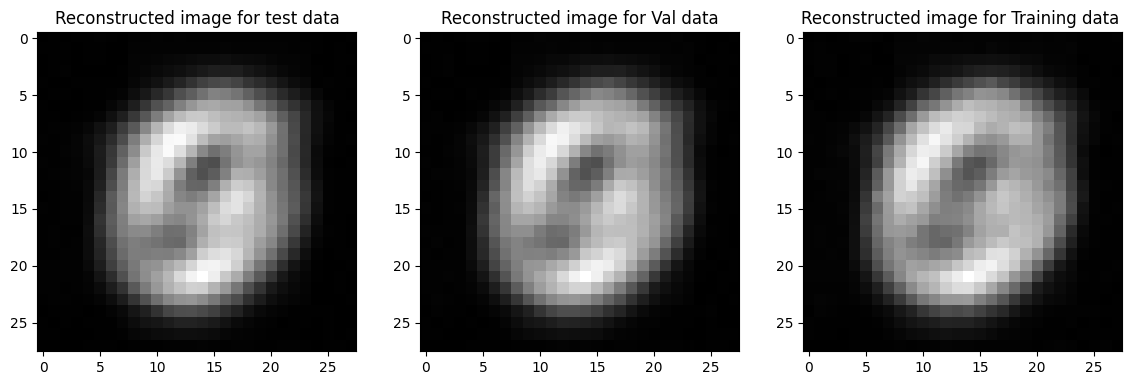

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data")

plt.imshow(predicted_Autoencoder1L_32_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data")

plt.imshow(predicted_Autoencoder1L_32_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data ")

plt.imshow(predicted_Autoencoder1L_32_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
encoder_input1L_128=keras.Input(shape=(784,),name="inputimg")
encoder_output1L_128=keras.layers.Dense(128,activation="sigmoid")(encoder_input1L_128)
encoder1L_128=keras.Model(encoder_input1L_128,encoder_output1L_128,name="encoder")
decoder_output1L_128=keras.layers.Dense(784,activation="sigmoid")(encoder_output1L_128)
autoencoder1L_128=keras.Model(encoder_input1L_128,decoder_output1L_128,name="autoencoder")

opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]
autoencoder1L_128.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

history_autoencoder1L_128 = autoencoder1L_128.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=10,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10
229/229 [==============================] - 3s 10ms/step - loss: 0.0688 - accuracy: 5.2609e-04 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 2/10
229/229 [==============================] - 2s 8ms/step - loss: 0.0456 - accuracy: 0.0022 - val_loss: 0.0398 - val_accuracy: 0.0021
Epoch 3/10
229/229 [==============================] - 2s 9ms/step - loss: 0.0359 - accuracy: 0.0017 - val_loss: 0.0328 - val_accuracy: 0.0021
Epoch 4/10
229/229 [==============================] - 2s 9ms/step - loss: 0.0299 - accuracy: 0.0023 - val_loss: 0.0276 - val_accuracy: 0.0026
Epoch 5/10
229/229 [==============================] - 2s 10ms/step - loss: 0.0253 - accuracy: 0.0032 - val_loss: 0.0238 - val_accuracy: 0.0026
Epoch 6/10
229/229 [==============================] - 3s 14ms/step - loss: 0.0219 - accuracy: 0.0039 - val_loss: 0.0208 - val_accuracy: 0.0026
Epoch 7/10
229/229 [==============================] - 2s 9ms/step - loss: 0.0193 - accuracy: 0.0040 - val_loss: 0.0184 - val_accuracy: 0.

In [ ]:
predicted_Autoencoder1L_128_Test=autoencoder1L_128.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_128_Tr=autoencoder1L_128.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_128_Val=autoencoder1L_128.predict(ValDataFlatten/255.0)

119/119 [==============================] - 0s 2ms/step


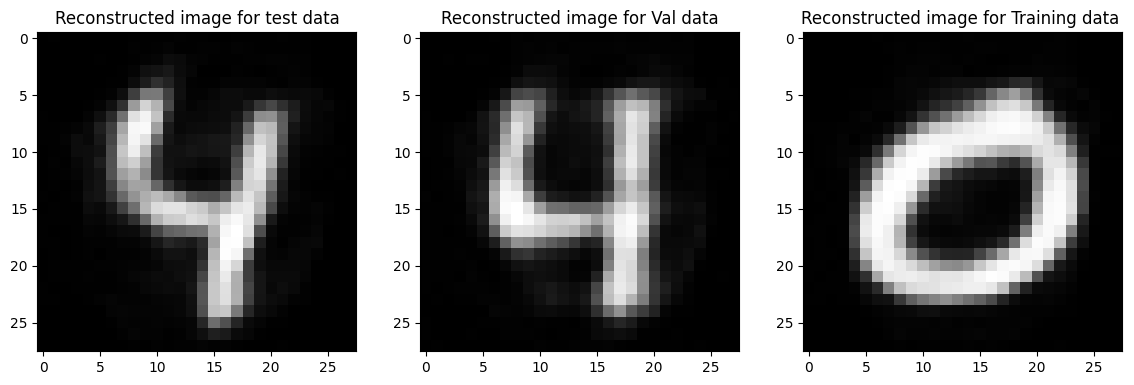

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data")

plt.imshow(predicted_Autoencoder1L_128_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data")

plt.imshow(predicted_Autoencoder1L_128_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data ")

plt.imshow(predicted_Autoencoder1L_128_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
encoder_input1L_256=keras.Input(shape=(784,),name="inputimg")
encoder_output1L_256=keras.layers.Dense(256,activation="sigmoid")(encoder_input1L_256)
encoder1L_256=keras.Model(encoder_input1L_256,encoder_output1L_256,name="encoder")
decoder_output1L_256=keras.layers.Dense(784,activation="sigmoid")(encoder_output1L_256)
autoencoder1L_256=keras.Model(encoder_input1L_256,decoder_output1L_256,name="autoencoder")

opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]
autoencoder1L_256.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

history_autoencoder1L_256 = autoencoder1L_256.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=10,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10
229/229 [==============================] - 5s 18ms/step - loss: 0.0559 - accuracy: 0.0017 - val_loss: 0.0375 - val_accuracy: 0.0011
Epoch 2/10
229/229 [==============================] - 3s 11ms/step - loss: 0.0308 - accuracy: 0.0023 - val_loss: 0.0256 - val_accuracy: 0.0018
Epoch 3/10
229/229 [==============================] - 3s 12ms/step - loss: 0.0218 - accuracy: 0.0038 - val_loss: 0.0189 - val_accuracy: 0.0029
Epoch 4/10
229/229 [==============================] - 3s 13ms/step - loss: 0.0166 - accuracy: 0.0039 - val_loss: 0.0149 - val_accuracy: 0.0045
Epoch 5/10
229/229 [==============================] - 4s 18ms/step - loss: 0.0132 - accuracy: 0.0049 - val_loss: 0.0121 - val_accuracy: 0.0050
Epoch 6/10
229/229 [==============================] - 3s 12ms/step - loss: 0.0109 - accuracy: 0.0058 - val_loss: 0.0102 - val_accuracy: 0.0047
Epoch 7/10
229/229 [==============================] - 2s 11ms/step - loss: 0.0092 - accuracy: 0.0062 - val_loss: 0.0088 - val_accuracy: 0.0063

In [ ]:
predicted_Autoencoder1L_256_Test=autoencoder1L_256.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_256_Tr=autoencoder1L_256.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_256_Val=autoencoder1L_256.predict(ValDataFlatten/255.0)

119/119 [==============================] - 0s 3ms/step


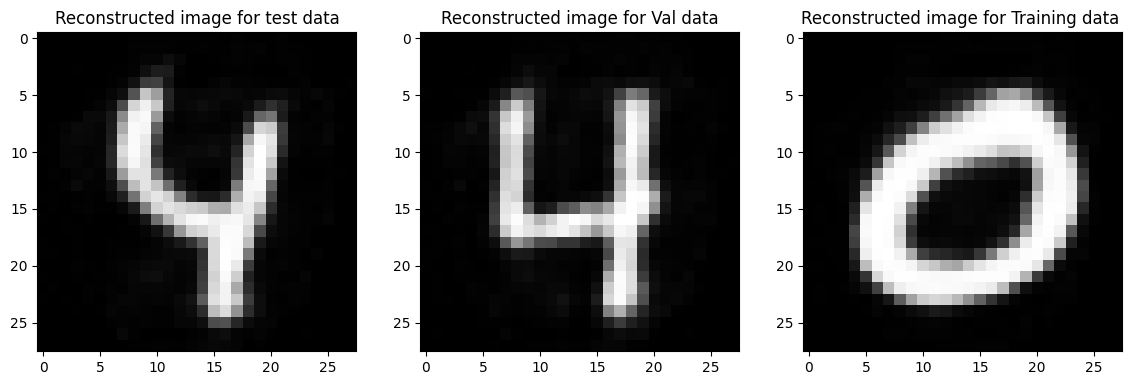

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data")

plt.imshow(predicted_Autoencoder1L_256_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data")

plt.imshow(predicted_Autoencoder1L_256_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data ")

plt.imshow(predicted_Autoencoder1L_256_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
predicted_encoder1L_32_Test=encoder1L_32.predict(TestDataFlatten/255.0)
predicted_encoder1L_64_Test=encoder1L_64.predict(TestDataFlatten/255.0)
predicted_encoder1L_128_Test=encoder1L_128.predict(TestDataFlatten/255.0)
predicted_encoder1L_256_Test=encoder1L_256.predict(TestDataFlatten/255.0)
predicted_encoder1L_32_Val=encoder1L_32.predict(ValDataFlatten/255.0)
predicted_encoder1L_64_Val=encoder1L_64.predict(ValDataFlatten/255.0)
predicted_encoder1L_128_Val=encoder1L_128.predict(ValDataFlatten/255.0)
predicted_encoder1L_256_Val=encoder1L_256.predict(ValDataFlatten/255.0)
predicted_encoder1L_32_Tr=encoder1L_32.predict(TrDataFlatten/255.0)
predicted_encoder1L_64_Tr=encoder1L_64.predict(TrDataFlatten/255.0)
predicted_encoder1L_128_Tr=encoder1L_128.predict(TrDataFlatten/255.0)
predicted_encoder1L_256_Tr=encoder1L_256.predict(TrDataFlatten/255.0)

357/357 [==============================] - 1s 2ms/step


In [ ]:
predicted_Autoencoder1L_32_Test=autoencoder1L_32.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_64_Test=autoencoder1L_64.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_128_Test=autoencoder1L_128.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_256_Test=autoencoder1L_256.predict(TestDataFlatten/255.0)
predicted_Autoencoder1L_32_Val=autoencoder1L_32.predict(ValDataFlatten/255.0)
predicted_Autoencoder1L_64_Val=autoencoder1L_64.predict(ValDataFlatten/255.0)
predicted_Autoencoder1L_128_Val=autoencoder1L_128.predict(ValDataFlatten/255.0)
predicted_Autoencoder1L_256_Val=autoencoder1L_256.predict(ValDataFlatten/255.0)
predicted_Autoencoder1L_32_Tr=autoencoder1L_32.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_64_Tr=autoencoder1L_64.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_128_Tr=autoencoder1L_128.predict(TrDataFlatten/255.0)
predicted_Autoencoder1L_256_Tr=autoencoder1L_256.predict(TrDataFlatten/255.0)

357/357 [==============================] - 1s 3ms/step


o/p image for test data for 32 node 


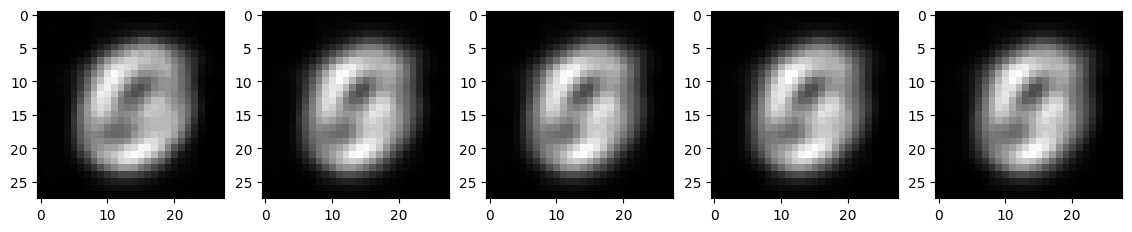

In [ ]:
#o/p image for test data passesd through 1 hidden layer autoencoder with 32 nodes in bottleneck layer
print("o/p image for test data for 32 node ")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_32_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_32_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_32_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_32_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_32_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for test data for 64 node 


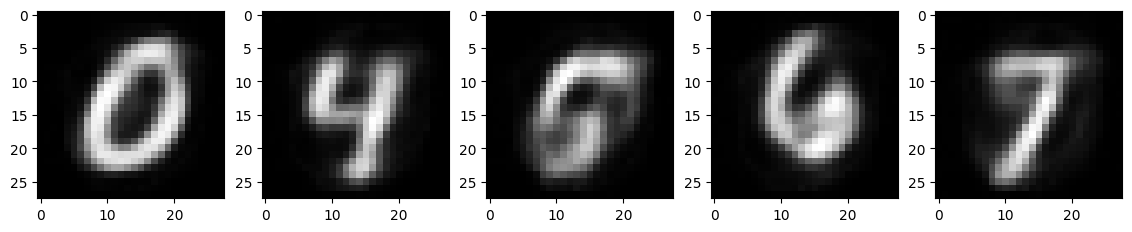

In [ ]:
#o/p image for test data passesd through 1 hidden layer autoencoder with 64 nodes in bottleneck layer
print("o/p image for test data for 64 node ")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_64_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_64_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_64_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_64_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_64_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for test data for 128 node


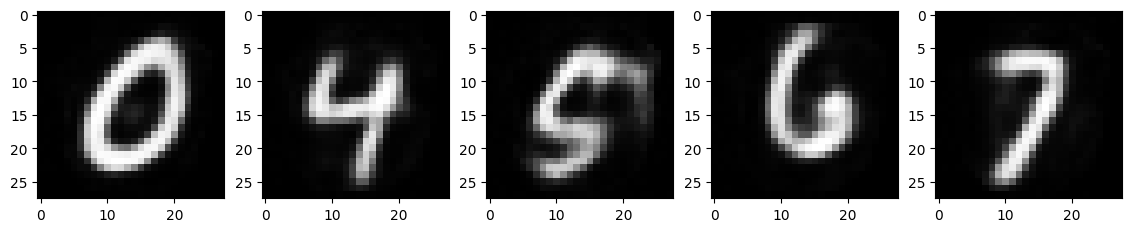

In [ ]:
#o/p image for test data passesd through 1 hidden layer autoencoder with 128 nodes in bottleneck layer
print("o/p image for test data for 128 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_128_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_128_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_128_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_128_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_128_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for test data for 256 node


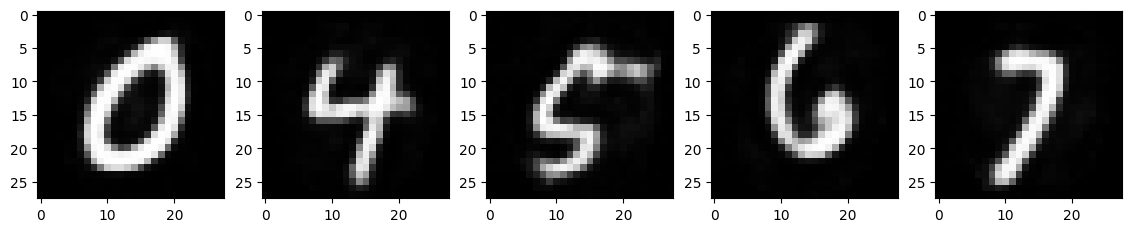

In [ ]:
#o/p image for test data passesd through 1 hidden layer autoencoder with 256 nodes in bottleneck layer
print("o/p image for test data for 256 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_256_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_256_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_256_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_256_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_256_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Tr data for 64 node


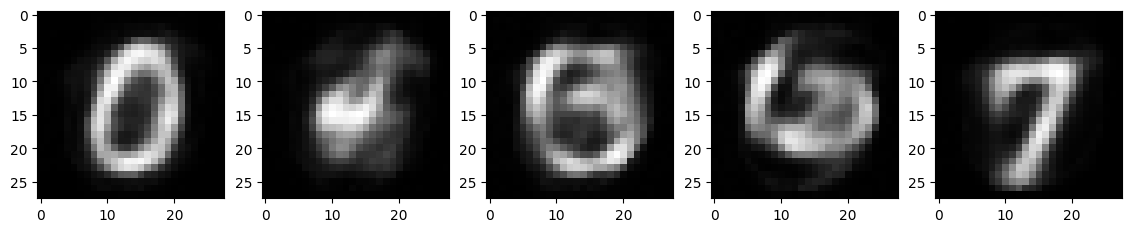

In [ ]:
#o/p image for Tr data passesd through 1 hidden layer autoencoder with 64 nodes in bottleneck layer
print("o/p image for Tr data for 64 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_64_Tr[0,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_64_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_64_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_64_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_64_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Tr data for 128 node


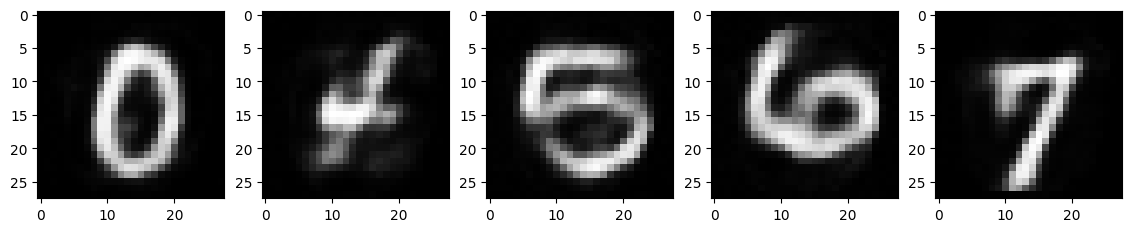

In [ ]:
#o/p image for Tr data passesd through 1 hidden layer autoencoder with 128 nodes in bottleneck layer
print("o/p image for Tr data for 128 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_128_Tr[0,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_128_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_128_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_128_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_128_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Tr data for 256 node


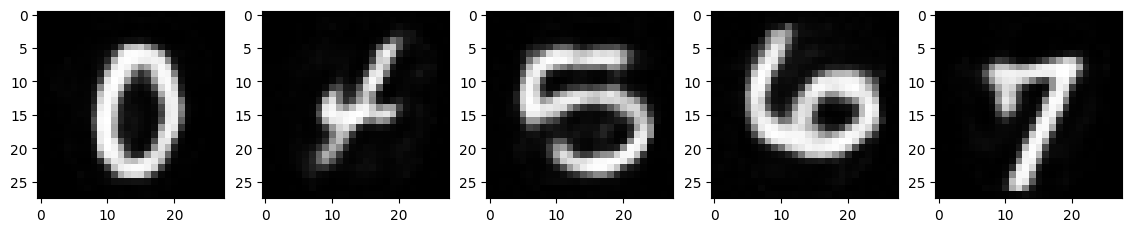

In [ ]:
#o/p image for Tr data passesd through 1 hidden layer autoencoder with 256 nodes in bottleneck layer
print("o/p image for Tr data for 256 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_256_Tr[0,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_256_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_256_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_256_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_256_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Tr data for 32 node


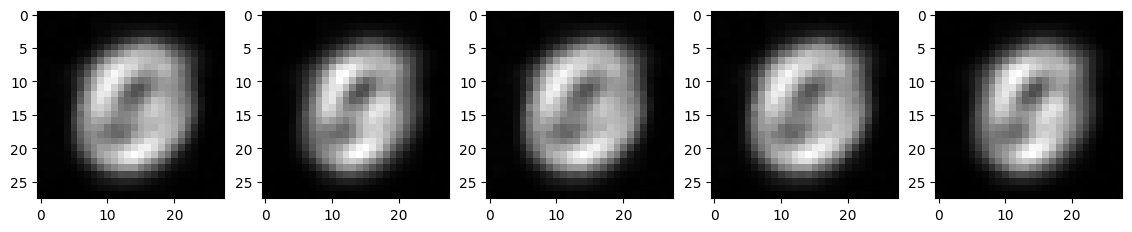

In [ ]:
#o/p image for Tr data passesd through 1 hidden layer autoencoder with 32 nodes in bottleneck layer
print("o/p image for Tr data for 32 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_32_Tr[2288,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_32_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_32_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_32_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_32_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Valdata for 32 node


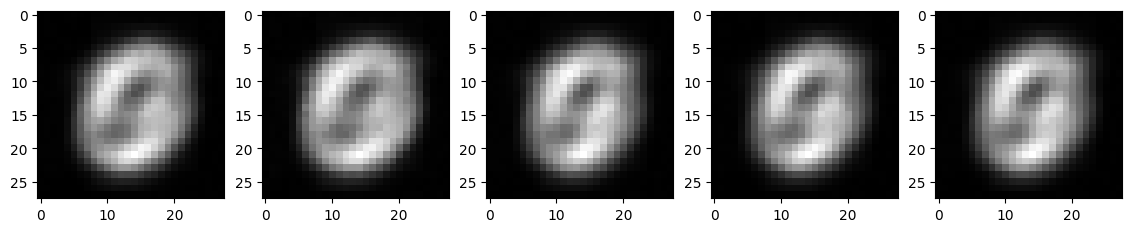

In [ ]:
#o/p image for Valdata passesd through 1 hidden layer autoencoder with 32 nodes in bottleneck layer
print("o/p image for Valdata for 32 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_32_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_32_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_32_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_32_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_32_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Valdata for 64 node


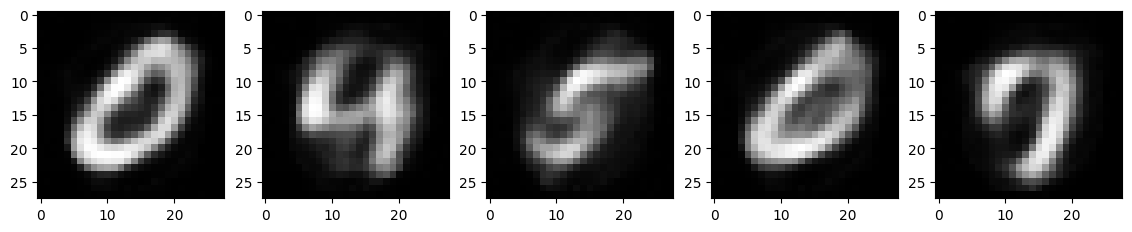

In [ ]:
#o/p image for Valdata passesd through 1 hidden layer autoencoder with 64 nodes in bottleneck layer
print("o/p image for Valdata for 64 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_64_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_64_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_64_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_64_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_64_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Valdata for 128 node


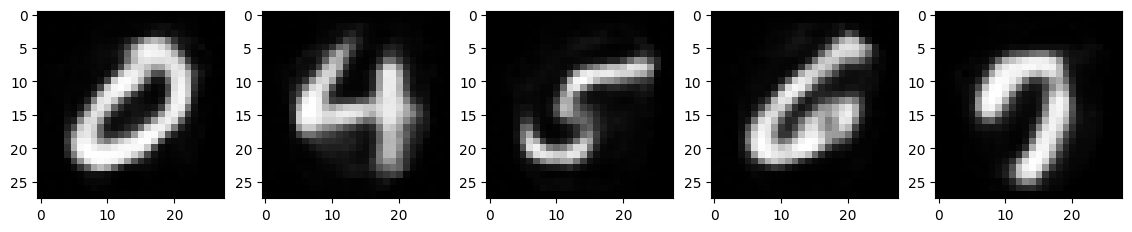

In [ ]:
#o/p image for Valdata passesd through 1 hidden layer autoencoder with 128 nodes in bottleneck layer
print("o/p image for Valdata for 128 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_128_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_128_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_128_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_128_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_128_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

o/p image for Valdata for 256 node


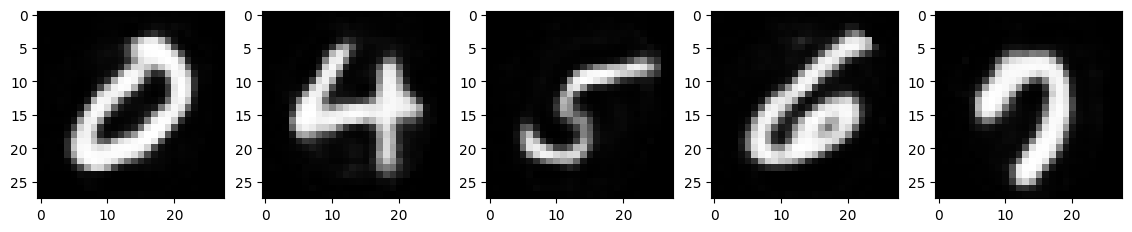

In [ ]:
#o/p image for Valdata passesd through 1 hidden layer autoencoder with 256 nodes in bottleneck layer
print("o/p image for Valdata for 256 node")
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder1L_256_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder1L_256_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder1L_256_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder1L_256_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder1L_256_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
AvgReconsError1L_32_Test=AvgReconstructionError(predicted_Autoencoder1L_32_Test,TestDataFlatten/255.0)
AvgReconsError1L_32_Tr=AvgReconstructionError(predicted_Autoencoder1L_32_Tr,TrDataFlatten/255.0)
AvgReconsError1L_32_Val=AvgReconstructionError(predicted_Autoencoder1L_32_Val,ValDataFlatten/255.0)


In [ ]:
AvgReconsError1L_64_Test=AvgReconstructionError(predicted_Autoencoder1L_64_Test,TestDataFlatten/255.0)
AvgReconsError1L_64_Tr=AvgReconstructionError(predicted_Autoencoder1L_64_Tr,TrDataFlatten/255.0)
AvgReconsError1L_64_Val=AvgReconstructionError(predicted_Autoencoder1L_64_Val,ValDataFlatten/255.0)

In [ ]:
AvgReconsError1L_128_Test=AvgReconstructionError(predicted_Autoencoder1L_128_Test,TestDataFlatten/255.0)
AvgReconsError1L_128_Tr=AvgReconstructionError(predicted_Autoencoder1L_128_Tr,TrDataFlatten/255.0)
AvgReconsError1L_128_Val=AvgReconstructionError(predicted_Autoencoder1L_128_Val,ValDataFlatten/255.0)

In [ ]:
AvgReconsError1L_256_Test=AvgReconstructionError(predicted_Autoencoder1L_256_Test,TestDataFlatten/255.0)
AvgReconsError1L_256_Tr=AvgReconstructionError(predicted_Autoencoder1L_256_Tr,TrDataFlatten/255.0)
AvgReconsError1L_256_Val=AvgReconstructionError(predicted_Autoencoder1L_256_Val,ValDataFlatten/255.0)

In [ ]:
print("Reconstruction error for 32,64,128,256 node for training data:",AvgReconsError1L_32_Tr,AvgReconsError1L_64_Tr,AvgReconsError1L_128_Tr,AvgReconsError1L_256_Tr)

Reconstruction error for 32,64,128,256 node for training data: 0.06416750949956705 0.03135527283616347 0.0131621249558664 0.0059563750064732125


In [ ]:
print("Reconstruction error for 32,64,128,256 node for test data:",AvgReconsError1L_32_Test,AvgReconsError1L_64_Test,AvgReconsError1L_128_Test,AvgReconsError1L_256_Test)

Reconstruction error for 32,64,128,256 node for test data: 0.06445698121027058 0.03175360875980176 0.01372950262434451 0.006436721066529552


In [ ]:
print("ReconsValuction error for 32,64,128,256 node for Validation data:",AvgReconsError1L_32_Val,AvgReconsError1L_64_Val,AvgReconsError1L_128_Val,AvgReconsError1L_256_Val)

ReconsValuction error for 32,64,128,256 node for Validation data: 0.06435633689248517 0.031642046603130115 0.013578639745099673 0.006327405337811347


In [ ]:
classifier_32_1layer= keras.Sequential(
    [
        Input(shape=(32,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier_32_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_32_1layer = classifier_32_1layer.fit(x=predicted_encoder1L_32_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_32_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 5s 15ms/step - loss: 1.5436 - accuracy: 0.2744 - val_loss: 1.3468 - val_accuracy: 0.3934
Epoch 2/10000
229/229 [==============================] - 2s 11ms/step - loss: 1.1897 - accuracy: 0.4978 - val_loss: 1.1370 - val_accuracy: 0.5204
Epoch 3/10000
229/229 [==============================] - 3s 13ms/step - loss: 1.0930 - accuracy: 0.5450 - val_loss: 1.0896 - val_accuracy: 0.5393
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 1.0718 - accuracy: 0.5535 - val_loss: 1.0319 - val_accuracy: 0.5619
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 1.0320 - accuracy: 0.5724 - val_loss: 1.1234 - val_accuracy: 0.5403
Epoch 6/10000
229/229 [==============================] - 2s 7ms/step - loss: 1.0327 - accuracy: 0.5685 - val_loss: 1.0519 - val_accuracy: 0.5658


In [ ]:
classifier_64_1layer= keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier_64_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_64_1layer = classifier_64_1layer.fit(x=predicted_encoder1L_64_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_64_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 4s 13ms/step - loss: 1.0399 - accuracy: 0.6069 - val_loss: 0.3267 - val_accuracy: 0.9059
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2512 - accuracy: 0.9264 - val_loss: 0.1955 - val_accuracy: 0.9393
Epoch 3/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2015 - accuracy: 0.9355 - val_loss: 0.1845 - val_accuracy: 0.9401
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1884 - accuracy: 0.9385 - val_loss: 0.1743 - val_accuracy: 0.9419
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1769 - accuracy: 0.9424 - val_loss: 0.1887 - val_accuracy: 0.9409
Epoch 6/10000
229/229 [==============================] - 3s 12ms/step - loss: 0.1722 - accuracy: 0.9423 - val_loss: 0.1602 - val_accuracy: 0.9506
Epoch 7/10000
229/229 [==============================] - 3s 13ms/step - loss: 0.1631 - accuracy: 0.9463 - val_loss: 0.1773 - va

In [ ]:
classifier_128_1layer= keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier_128_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_128_1layer = classifier_128_1layer.fit(x=predicted_encoder1L_128_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_128_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 4s 12ms/step - loss: 0.7578 - accuracy: 0.7380 - val_loss: 0.1726 - val_accuracy: 0.9548
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1528 - accuracy: 0.9532 - val_loss: 0.1472 - val_accuracy: 0.9556
Epoch 3/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1269 - accuracy: 0.9598 - val_loss: 0.1383 - val_accuracy: 0.9551
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1125 - accuracy: 0.9648 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 5/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.1033 - accuracy: 0.9676 - val_loss: 0.1003 - val_accuracy: 0.9671
Epoch 6/10000
229/229 [==============================] - 4s 16ms/step - loss: 0.0943 - accuracy: 0.9701 - val_loss: 0.1057 - val_accuracy: 0.9653
Epoch 7/10000
229/229 [==============================] - 3s 11ms/step - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.1009 - v

In [ ]:
classifier_256_1layer= keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier_256_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_256_1layer = classifier_256_1layer.fit(x=predicted_encoder1L_256_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_256_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 11ms/step - loss: 0.5475 - accuracy: 0.8302 - val_loss: 0.1663 - val_accuracy: 0.9445
Epoch 2/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1274 - accuracy: 0.9613 - val_loss: 0.1383 - val_accuracy: 0.9543
Epoch 3/10000
229/229 [==============================] - 4s 15ms/step - loss: 0.1077 - accuracy: 0.9660 - val_loss: 0.1266 - val_accuracy: 0.9606
Epoch 4/10000
229/229 [==============================] - 3s 13ms/step - loss: 0.0977 - accuracy: 0.9690 - val_loss: 0.1037 - val_accuracy: 0.9650
Epoch 5/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.0864 - accuracy: 0.9733 - val_loss: 0.0889 - val_accuracy: 0.9727
Epoch 6/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0826 - val_accuracy: 0.9737
Epoch 7/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.0822 - accuracy: 0.9736 - val_loss: 0.0756 -

In [ ]:
print(classifier_256_1layer.evaluate(predicted_encoder1L_256_Val,ValLabel))

119/119 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9761
[0.07563672214746475, 0.9760841131210327]


In [ ]:
pTest=classifier_256_1layer.predict(predicted_encoder1L_256_Test)
print(pTest.shape)

119/119 [==============================] - 0s 3ms/step
(3805, 5)


In [ ]:
test=[]
testlabel=[]
for i in range(TestDataFlatten.shape[0]):
  test.append(np.argmax(pTest[i,:]))
  testlabel.append(np.argmax(TestLabel[i,:]))


In [ ]:
cmtest_1L=sklearn.metrics.confusion_matrix(testlabel,test)
print(cmtest_1L)

[[750   5   5   6   3]
 [  0 745   6   4   4]
 [  6   6 734  12   1]
 [  2   4  14 739   0]
 [  3  13   5   4 734]]


In [ ]:
print(classifier_128_1layer.evaluate(predicted_encoder1L_128_Val,ValLabel))

119/119 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9714
[0.09336543083190918, 0.9713534712791443]


In [ ]:
print(classifier_64_1layer.evaluate(predicted_encoder1L_64_Val,ValLabel))

119/119 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9506
[0.14843890070915222, 0.9505913257598877]


In [ ]:
print("Accuracy for training data for 1 hidden layer 256 node:" ,classifier_256_1layer.evaluate(x=predicted_encoder1L_256_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 256 node:",classifier_256_1layer.evaluate(x=predicted_encoder1L_256_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 256 node:",classifier_256_1layer.evaluate(x=predicted_encoder1L_256_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9823
Accuracy for training data for 1 hidden layer 256 node: 0.9822884798049927
119/119 [==============================] - 1s 4ms/step - loss: 0.0879 - accuracy: 0.9729
Accuracy for test data for 1 hidden layer 256 node: 0.972930371761322
119/119 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9761
Accuracy for val data for 1 hidden layer 256 node: 0.9760841131210327


In [ ]:
print("Accuracy for training data for 1 hidden layer 128 node:" ,classifier_128_1layer.evaluate(x=predicted_encoder1L_128_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 128 node:",classifier_128_1layer.evaluate(x=predicted_encoder1L_128_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 128 node:",classifier_128_1layer.evaluate(x=predicted_encoder1L_128_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9740
Accuracy for training data for 1 hidden layer 128 node: 0.9740464687347412
119/119 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9706
Accuracy for test data for 1 hidden layer 128 node: 0.9705650210380554
119/119 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9714
Accuracy for val data for 1 hidden layer 128 node: 0.9713534712791443


In [ ]:
print("Accuracy for training data for 1 hidden layer 64 node:" ,classifier_64_1layer.evaluate(x=predicted_encoder1L_64_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 64 node:",classifier_64_1layer.evaluate(x=predicted_encoder1L_64_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 64 node:",classifier_64_1layer.evaluate(x=predicted_encoder1L_64_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9505
Accuracy for training data for 1 hidden layer 64 node: 0.9504603147506714
119/119 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9524
Accuracy for test data for 1 hidden layer 64 node: 0.9524310231208801
119/119 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9506
Accuracy for val data for 1 hidden layer 64 node: 0.9505913257598877


In [ ]:
print("Accuracy for training data for 1 hidden layer 32 node:" ,classifier_32_1layer.evaluate(x=predicted_encoder1L_32_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 32 node:",classifier_32_1layer.evaluate(x=predicted_encoder1L_32_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 32 node:",classifier_32_1layer.evaluate(x=predicted_encoder1L_32_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 1.0373 - accuracy: 0.5701
Accuracy for training data for 1 hidden layer 32 node: 0.5701008439064026
119/119 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.5569
Accuracy for test data for 1 hidden layer 32 node: 0.556898832321167
119/119 [==============================] - 0s 3ms/step - loss: 1.0519 - accuracy: 0.5658
Accuracy for val data for 1 hidden layer 32 node: 0.5658344030380249


In [ ]:
classifier2_256_1layer= keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2" ),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_256_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_256_1layer = classifier2_256_1layer.fit(x=predicted_encoder1L_256_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_256_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 2s 5ms/step - loss: 0.7925 - accuracy: 0.7562 - val_loss: 0.2054 - val_accuracy: 0.9498
Epoch 2/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1505 - accuracy: 0.9587 - val_loss: 0.1207 - val_accuracy: 0.9645
Epoch 3/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.1088 - val_accuracy: 0.9650
Epoch 4/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1017 - accuracy: 0.9682 - val_loss: 0.1061 - val_accuracy: 0.9669
Epoch 5/10000
229/229 [==============================] - 1s 6ms/step - loss: 0.0937 - accuracy: 0.9709 - val_loss: 0.0936 - val_accuracy: 0.9690
Epoch 6/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.0831 - accuracy: 0.9746 - val_loss: 0.0879 - val_accuracy: 0.9724
Epoch 7/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.0852 - val_ac

In [ ]:
classifier2_128_1layer= keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(128, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_128_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_128_1layer = classifier2_128_1layer.fit(x=predicted_encoder1L_128_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_128_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.7619 - accuracy: 0.7534 - val_loss: 0.2231 - val_accuracy: 0.9317
Epoch 2/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1543 - accuracy: 0.9535 - val_loss: 0.1752 - val_accuracy: 0.9424
Epoch 3/10000
229/229 [==============================] - 3s 11ms/step - loss: 0.1243 - accuracy: 0.9600 - val_loss: 0.1261 - val_accuracy: 0.9611
Epoch 4/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1131 - accuracy: 0.9611 - val_loss: 0.1056 - val_accuracy: 0.9664
Epoch 5/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1023 - accuracy: 0.9678 - val_loss: 0.1195 - val_accuracy: 0.9629
Epoch 6/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.0965 - accuracy: 0.9690 - val_loss: 0.1163 - val_accuracy: 0.9619
Epoch 7/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.0928 - accuracy: 0.9699 - val_loss: 0.0971 - val_

In [ ]:
classifier2_64_1layer= keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(64, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_64_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_64_1layer = classifier2_64_1layer.fit(x=predicted_encoder1L_64_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_64_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 10ms/step - loss: 1.1156 - accuracy: 0.6046 - val_loss: 0.3767 - val_accuracy: 0.9183
Epoch 2/10000
229/229 [==============================] - 2s 8ms/step - loss: 0.2637 - accuracy: 0.9253 - val_loss: 0.2157 - val_accuracy: 0.9327
Epoch 3/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.2011 - accuracy: 0.9358 - val_loss: 0.2058 - val_accuracy: 0.9338
Epoch 4/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1896 - accuracy: 0.9401 - val_loss: 0.2177 - val_accuracy: 0.9283
Epoch 5/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1787 - accuracy: 0.9425 - val_loss: 0.1681 - val_accuracy: 0.9469
Epoch 6/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1644 - accuracy: 0.9472 - val_loss: 0.1628 - val_accuracy: 0.9472
Epoch 7/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1597 - accuracy: 0.9476 - val_loss: 0.1844 - val_a

In [ ]:
classifier2_32_1layer= keras.Sequential(
    [
        Input(shape=(32,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(32, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_32_1layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_32_1layer = classifier2_32_1layer.fit(x=predicted_encoder1L_32_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder1L_32_Val,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 2s 4ms/step - loss: 1.5721 - accuracy: 0.2737 - val_loss: 1.4136 - val_accuracy: 0.3779
Epoch 2/10000
229/229 [==============================] - 1s 3ms/step - loss: 1.2495 - accuracy: 0.4839 - val_loss: 1.1404 - val_accuracy: 0.5611
Epoch 3/10000
229/229 [==============================] - 1s 3ms/step - loss: 1.1137 - accuracy: 0.5421 - val_loss: 1.1002 - val_accuracy: 0.5427
Epoch 4/10000
229/229 [==============================] - 1s 3ms/step - loss: 1.0880 - accuracy: 0.5501 - val_loss: 1.0661 - val_accuracy: 0.5482
Epoch 5/10000
229/229 [==============================] - 1s 3ms/step - loss: 1.0653 - accuracy: 0.5604 - val_loss: 1.0518 - val_accuracy: 0.5729
Epoch 6/10000
229/229 [==============================] - 1s 4ms/step - loss: 1.0519 - accuracy: 0.5633 - val_loss: 1.0216 - val_accuracy: 0.5758
Epoch 7/10000
229/229 [==============================] - 1s 4ms/step - loss: 1.0164 - accuracy: 0.5842 - val_loss: 1.0101 - val_ac

In [ ]:
print("Accuracy for training data for 1 hidden layer 32 node:" ,classifier2_32_1layer.evaluate(x=predicted_encoder1L_32_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 32 node:",classifier2_32_1layer.evaluate(x=predicted_encoder1L_32_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 32 node:",classifier2_32_1layer.evaluate(x=predicted_encoder1L_32_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 0.8749 - accuracy: 0.6799
Accuracy for training data for 1 hidden layer 32 node: 0.6798772215843201
119/119 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.6675
Accuracy for test data for 1 hidden layer 32 node: 0.6675426959991455
119/119 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.6728
Accuracy for val data for 1 hidden layer 32 node: 0.6727989315986633


In [ ]:
print("Accuracy for training data for 1 hidden layer 64 node:" ,classifier2_64_1layer.evaluate(x=predicted_encoder1L_64_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 64 node:",classifier2_64_1layer.evaluate(x=predicted_encoder1L_64_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 64 node:",classifier2_64_1layer.evaluate(x=predicted_encoder1L_64_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 3ms/step - loss: 0.1375 - accuracy: 0.9541
Accuracy for training data for 1 hidden layer 64 node: 0.9541429281234741
119/119 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9580
Accuracy for test data for 1 hidden layer 64 node: 0.9579500555992126
119/119 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9514
Accuracy for val data for 1 hidden layer 64 node: 0.9513797760009766


In [ ]:
print("Accuracy for training data for 1 hidden layer 128 node:" ,classifier2_128_1layer.evaluate(x=predicted_encoder1L_128_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 128 node:",classifier2_128_1layer.evaluate(x=predicted_encoder1L_128_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 128 node:",classifier2_128_1layer.evaluate(x=predicted_encoder1L_128_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9770
Accuracy for training data for 1 hidden layer 128 node: 0.9770275950431824
119/119 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9711
Accuracy for test data for 1 hidden layer 128 node: 0.9710906744003296
119/119 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9714
Accuracy for val data for 1 hidden layer 128 node: 0.9713534712791443


In [ ]:
print("Accuracy for training data for 1 hidden layer 256 node:" ,classifier2_256_1layer.evaluate(x=predicted_encoder1L_256_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 1 hidden layer 256 node:",classifier2_256_1layer.evaluate(x=predicted_encoder1L_256_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 1 hidden layer 256 node:",classifier2_256_1layer.evaluate(x=predicted_encoder1L_256_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.9925
Accuracy for training data for 1 hidden layer 256 node: 0.9924594759941101
119/119 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9756
Accuracy for test data for 1 hidden layer 256 node: 0.9755584597587585
119/119 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9811
Accuracy for val data for 1 hidden layer 256 node: 0.9810775518417358


In [ ]:
# 3  layer autoencoder for 64 nodes bottleneck layer
encoder_input_64=keras.Input(shape=(784,),name="inputimg")
hidden_output1_64=keras.layers.Dense(400,activation="sigmoid",name="hiddenL1")(encoder_input_64)
encoder_output_64=keras.layers.Dense(64,activation="sigmoid",name="bottleneck")(hidden_output1_64)
encoder_64=keras.Model(encoder_input_64,encoder_output_64,name="encoder")
hidden_output2_64=keras.layers.Dense(400,activation="sigmoid",name="hiddenl2")(encoder_output_64)
decoder_output_64=keras.layers.Dense(784,activation="sigmoid",name="decodedop")(hidden_output2_64)
autoencoder_64=keras.Model(encoder_input_64,decoder_output_64,name="autoencoder")
# defining optimizer and compiling the model
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]

autoencoder_64.compile(optimizer=opt,loss="mse",metrics=['accuracy'])
#autoencoder_64.summary()
history_autoencoder = autoencoder_64.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=5,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
autoencoder_64.save('autoencoder_64.h5')

Epoch 1/5
229/229 [==============================] - 5s 18ms/step - loss: 0.0663 - accuracy: 7.8913e-04 - val_loss: 0.0551 - val_accuracy: 0.0016
Epoch 2/5
229/229 [==============================] - 6s 24ms/step - loss: 0.0468 - accuracy: 0.0017 - val_loss: 0.0427 - val_accuracy: 0.0018
Epoch 3/5
229/229 [==============================] - 4s 17ms/step - loss: 0.0400 - accuracy: 0.0011 - val_loss: 0.0376 - val_accuracy: 0.0011
Epoch 4/5
229/229 [==============================] - 4s 16ms/step - loss: 0.0348 - accuracy: 0.0024 - val_loss: 0.0322 - val_accuracy: 0.0039
Epoch 5/5
229/229 [==============================] - 4s 19ms/step - loss: 0.0304 - accuracy: 0.0025 - val_loss: 0.0286 - val_accuracy: 0.0011


In [ ]:
# 3  layer autoencoder for 32 nodes bottleneck layer
encoder_input_32=keras.Input(shape=(784,),name="inputimg")
hidden_output1_32=keras.layers.Dense(400,activation="sigmoid",name="hiddenL1")(encoder_input_32)
encoder_output_32=keras.layers.Dense(32,activation="sigmoid",name="bottleneck")(hidden_output1_32)
encoder_32=keras.Model(encoder_input_32,encoder_output_32,name="encoder")
hidden_output2_32=keras.layers.Dense(400,activation="sigmoid",name="hiddenl2")(encoder_output_32)
decoder_output_32=keras.layers.Dense(784,activation="sigmoid",name="decodedop")(hidden_output2_32)
autoencoder_32=keras.Model(encoder_input_32,decoder_output_32,name="autoencoder")
# defining optimizer and compiling the model
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]

autoencoder_32.compile(optimizer=opt,loss="mse",metrics=['accuracy'])
#autoencoder_32.summary()
history_autoencoder = autoencoder_32.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=5,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
autoencoder_32.save('autoencoder_32.h5')

Epoch 1/5
229/229 [==============================] - 6s 19ms/step - loss: 0.0668 - accuracy: 0.0011 - val_loss: 0.0572 - val_accuracy: 2.6281e-04
Epoch 2/5
229/229 [==============================] - 3s 15ms/step - loss: 0.0505 - accuracy: 0.0016 - val_loss: 0.0455 - val_accuracy: 0.0034
Epoch 3/5
229/229 [==============================] - 4s 16ms/step - loss: 0.0433 - accuracy: 0.0011 - val_loss: 0.0419 - val_accuracy: 0.0018
Epoch 4/5
229/229 [==============================] - 5s 22ms/step - loss: 0.0396 - accuracy: 0.0023 - val_loss: 0.0365 - val_accuracy: 0.0032
Epoch 5/5
229/229 [==============================] - 4s 15ms/step - loss: 0.0344 - accuracy: 0.0020 - val_loss: 0.0331 - val_accuracy: 0.0021


In [ ]:
# 3  layer autoencoder for 128 nodes bottleneck layer
encoder_input_128=keras.Input(shape=(784,),name="inputimg")
hidden_output1_128=keras.layers.Dense(400,activation="sigmoid",name="hiddenL1")(encoder_input_128)
encoder_output_128=keras.layers.Dense(128,activation="sigmoid",name="bottleneck")(hidden_output1_128)
encoder_128=keras.Model(encoder_input_128,encoder_output_128,name="encoder")
hidden_output2_128=keras.layers.Dense(400,activation="sigmoid",name="hiddenl2")(encoder_output_128)
decoder_output_128=keras.layers.Dense(784,activation="sigmoid",name="decodedop")(hidden_output2_128)
autoencoder_128=keras.Model(encoder_input_128,decoder_output_128,name="autoencoder")
# defining optimizer and compiling the model
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]

autoencoder_128.compile(optimizer=opt,loss="mse",metrics=['accuracy'])
#autoencoder_128.summary()
history_autoencoder = autoencoder_128.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=5,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
autoencoder_128.save('autoencoder_128.h5')

Epoch 1/5
229/229 [==============================] - 6s 20ms/step - loss: 0.0660 - accuracy: 7.8913e-04 - val_loss: 0.0533 - val_accuracy: 0.0042
Epoch 2/5
229/229 [==============================] - 5s 24ms/step - loss: 0.0452 - accuracy: 0.0023 - val_loss: 0.0414 - val_accuracy: 0.0013
Epoch 3/5
229/229 [==============================] - 4s 18ms/step - loss: 0.0373 - accuracy: 0.0019 - val_loss: 0.0337 - val_accuracy: 0.0018
Epoch 4/5
229/229 [==============================] - 4s 18ms/step - loss: 0.0313 - accuracy: 0.0016 - val_loss: 0.0293 - val_accuracy: 0.0021
Epoch 5/5
229/229 [==============================] - 5s 23ms/step - loss: 0.0277 - accuracy: 0.0030 - val_loss: 0.0260 - val_accuracy: 0.0029


In [ ]:
# 3  layer autoencoder for 256 nodes bottleneck layer
encoder_input_256=keras.Input(shape=(784,),name="inputimg")
hidden_output1_256=keras.layers.Dense(400,activation="sigmoid",name="hiddenL1")(encoder_input_256)
encoder_output_256=keras.layers.Dense(256,activation="sigmoid",name="bottleneck")(hidden_output1_256)
encoder_256=keras.Model(encoder_input_256,encoder_output_256,name="encoder")
hidden_output2_256=keras.layers.Dense(400,activation="sigmoid",name="hiddenl2")(encoder_output_256)
decoder_output_256=keras.layers.Dense(784,activation="sigmoid",name="decodedop")(hidden_output2_256)
autoencoder_256=keras.Model(encoder_input_256,decoder_output_256,name="autoencoder")
# defining optimizer and compiling the model
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, )]

autoencoder_256.compile(optimizer=opt,loss="mse",metrics=['accuracy'])
#autoencoder_256.summary()
history_autoencoder = autoencoder_256.fit(x=TrDataFlatten/255.0,y=TrDataFlatten/255.0,batch_size=50,epochs=5,validation_split=0,validation_data=(ValDataFlatten/255.0,ValDataFlatten/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)
autoencoder_256.save('autoencoder_256.h5')

Epoch 1/5
229/229 [==============================] - 6s 20ms/step - loss: 0.0649 - accuracy: 0.0020 - val_loss: 0.0493 - val_accuracy: 0.0037
Epoch 2/5
229/229 [==============================] - 6s 26ms/step - loss: 0.0429 - accuracy: 0.0019 - val_loss: 0.0380 - val_accuracy: 5.2562e-04
Epoch 3/5
229/229 [==============================] - 5s 23ms/step - loss: 0.0341 - accuracy: 0.0023 - val_loss: 0.0309 - val_accuracy: 0.0037
Epoch 4/5
229/229 [==============================] - 4s 19ms/step - loss: 0.0284 - accuracy: 0.0025 - val_loss: 0.0264 - val_accuracy: 0.0021
Epoch 5/5
229/229 [==============================] - 6s 27ms/step - loss: 0.0238 - accuracy: 0.0025 - val_loss: 0.0224 - val_accuracy: 0.0016


Predicted autoencoder output for 3 hidden layer with different number of nodes in bottleneck layer

In [ ]:
predicted_Autoencoder_32_Test=autoencoder_32.predict(TestDataFlatten/255.0)
predicted_Autoencoder_64_Test=autoencoder_64.predict(TestDataFlatten/255.0)
predicted_Autoencoder_128_Test=autoencoder_128.predict(TestDataFlatten/255.0)
predicted_Autoencoder_256_Test=autoencoder_256.predict(TestDataFlatten/255.0)
predicted_Autoencoder_32_Val=autoencoder_32.predict(ValDataFlatten/255.0)
predicted_Autoencoder_64_Val=autoencoder_64.predict(ValDataFlatten/255.0)
predicted_Autoencoder_128_Val=autoencoder_128.predict(ValDataFlatten/255.0)
predicted_Autoencoder_256_Val=autoencoder_256.predict(ValDataFlatten/255.0)
predicted_Autoencoder_32_Tr=autoencoder_32.predict(TrDataFlatten/255.0)
predicted_Autoencoder_64_Tr=autoencoder_64.predict(TrDataFlatten/255.0)
predicted_Autoencoder_128_Tr=autoencoder_128.predict(TrDataFlatten/255.0)
predicted_Autoencoder_256_Tr=autoencoder_256.predict(TrDataFlatten/255.0)



357/357 [==============================] - 2s 5ms/step


In [ ]:
AvgReconsError3L_32_Test=AvgReconstructionError(predicted_Autoencoder_32_Test,TestDataFlatten/255.0)
AvgReconsError3L_32_Tr=AvgReconstructionError(predicted_Autoencoder_32_Tr,TrDataFlatten/255.0)
AvgReconsError3L_32_Val=AvgReconstructionError(predicted_Autoencoder_32_Val,ValDataFlatten/255.0)

In [ ]:
AvgReconsError3L_64_Test=AvgReconstructionError(predicted_Autoencoder_64_Test,TestDataFlatten/255.0)
AvgReconsError3L_64_Tr=AvgReconstructionError(predicted_Autoencoder_64_Tr,TrDataFlatten/255.0)
AvgReconsError3L_64_Val=AvgReconstructionError(predicted_Autoencoder_64_Val,ValDataFlatten/255.0)

In [ ]:
AvgReconsError3L_128_Test=AvgReconstructionError(predicted_Autoencoder_128_Test,TestDataFlatten/255.0)
AvgReconsError3L_128_Tr=AvgReconstructionError(predicted_Autoencoder_128_Tr,TrDataFlatten/255.0)
AvgReconsError3L_128_Val=AvgReconstructionError(predicted_Autoencoder_128_Val,ValDataFlatten/255.0)

In [ ]:
AvgReconsError3L_256_Test=AvgReconstructionError(predicted_Autoencoder_256_Test,TestDataFlatten/255.0)
AvgReconsError3L_256_Tr=AvgReconstructionError(predicted_Autoencoder_256_Tr,TrDataFlatten/255.0)
AvgReconsError3L_256_Val=AvgReconstructionError(predicted_Autoencoder_256_Val,ValDataFlatten/255.0)

**Average reconstruction error for 3 hidden layer**

In [ ]:
print("Reconstruction error for 32,64,128,256 node for training data:",AvgReconsError3L_32_Tr,AvgReconsError1L_64_Tr,AvgReconsError1L_128_Tr,AvgReconsError1L_256_Tr)

Reconstruction error for 32,64,128,256 node for training data: 0.03295558758315347 0.03135527283616347 0.0131621249558664 0.0059563750064732125


In [ ]:
print("ReconsTestuction error for 32,64,128,256 node for test data:",AvgReconsError3L_32_Test,AvgReconsError1L_64_Test,AvgReconsError1L_128_Test,AvgReconsError1L_256_Test)

ReconsTestuction error for 32,64,128,256 node for test data: 0.033394021109105436 0.03175360875980176 0.01372950262434451 0.006436721066529552


In [ ]:
print("ReconsValuction error for 32,64,128,256 node for validation data:",AvgReconsError3L_32_Val,AvgReconsError1L_64_Val,AvgReconsError1L_128_Val,AvgReconsError1L_256_Val)

ReconsValuction error for 32,64,128,256 node for validation data: 0.033098984859083046 0.031642046603130115 0.013578639745099673 0.006327405337811347


In [ ]:
predicted_encoder_32_Test=encoder_32.predict(TestDataFlatten/255.0)
predicted_encoder_64_Test=encoder_64.predict(TestDataFlatten/255.0)
predicted_encoder_128_Test=encoder_128.predict(TestDataFlatten/255.0)
predicted_encoder_256_Test=encoder_256.predict(TestDataFlatten/255.0)
predicted_encoder_32_Val=encoder_32.predict(ValDataFlatten/255.0)
predicted_encoder_64_Val=encoder_64.predict(ValDataFlatten/255.0)
predicted_encoder_128_Val=encoder_128.predict(ValDataFlatten/255.0)
predicted_encoder_256_Val=encoder_256.predict(ValDataFlatten/255.0)
predicted_encoder_32_Tr=encoder_32.predict(TrDataFlatten/255.0)
predicted_encoder_64_Tr=encoder_64.predict(TrDataFlatten/255.0)
predicted_encoder_128_Tr=encoder_128.predict(TrDataFlatten/255.0)
predicted_encoder_256_Tr=encoder_256.predict(TrDataFlatten/255.0)

357/357 [==============================] - 1s 3ms/step


Plot of reconstructed images from 3 hidden layer autoencoder

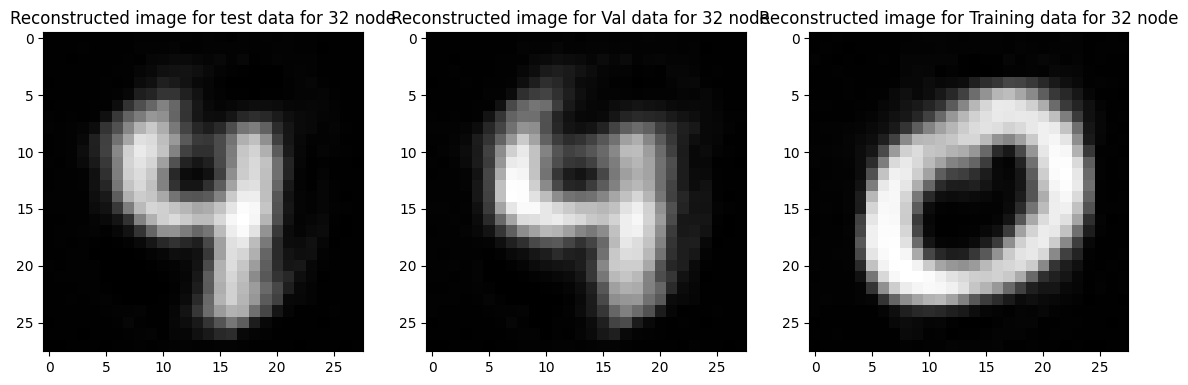

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data for 32 node")

plt.imshow(predicted_Autoencoder_32_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data for 32 node  ")

plt.imshow(predicted_Autoencoder_32_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data for 32 node")

plt.imshow(predicted_Autoencoder_32_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()



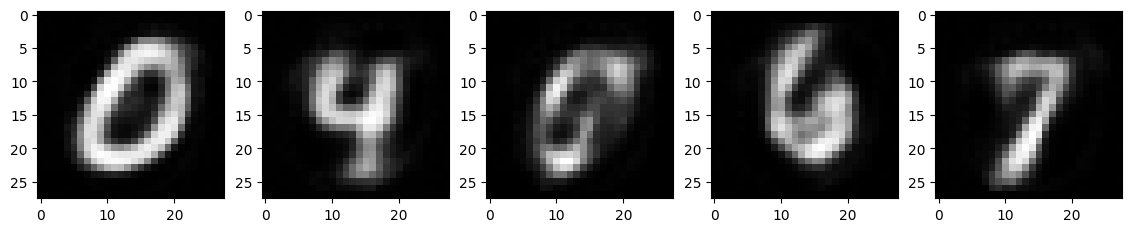

In [ ]:
#o/p image for test data passesd through 3 hidden layer autoencoder with 32 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_32_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_32_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_32_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_32_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_32_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()



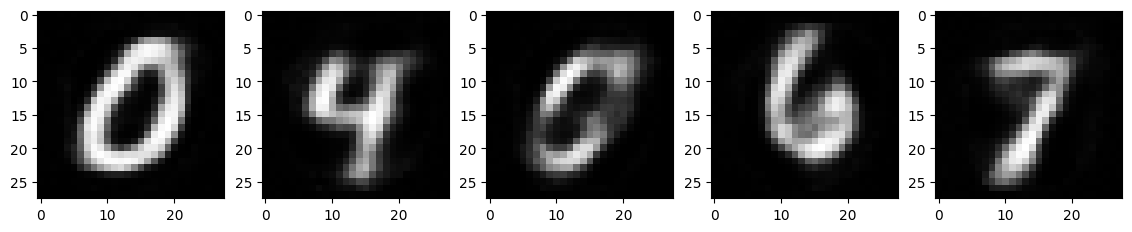

In [ ]:
#o/p image for test data passesd through 3 hidden layer autoencoder with 64 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_64_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_64_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_64_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_64_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_64_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

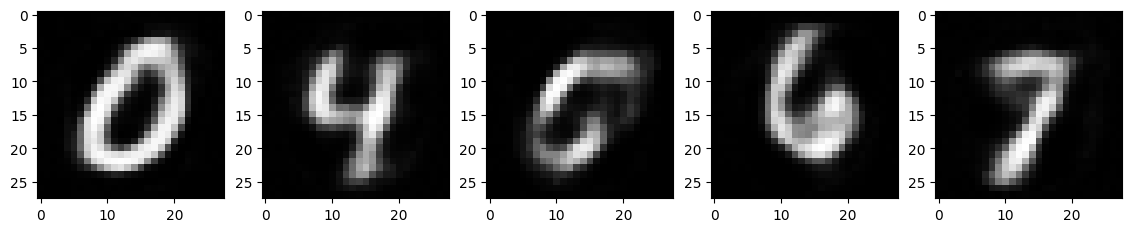

In [ ]:
#o/p image for test data passesd through 3 hidden layer autoencoder with 128 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_128_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_128_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_128_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_128_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_128_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

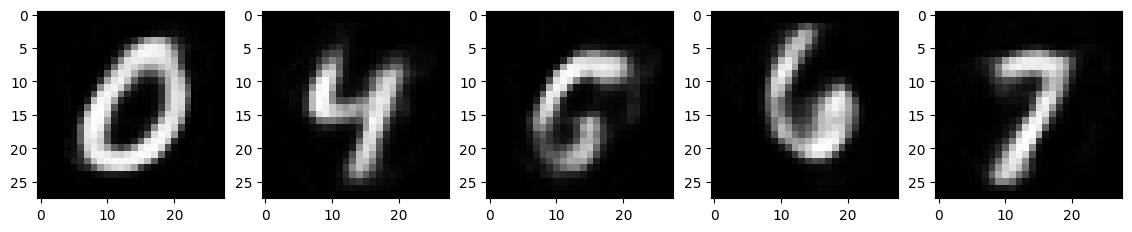

In [ ]:
#o/p image for test data passesd through 3 hidden layer autoencoder with 256 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_256_Test[766,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)
plt.imshow(predicted_Autoencoder_256_Test[770,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_256_Test[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)

plt.imshow(predicted_Autoencoder_256_Test[2289,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_256_Test[3047,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

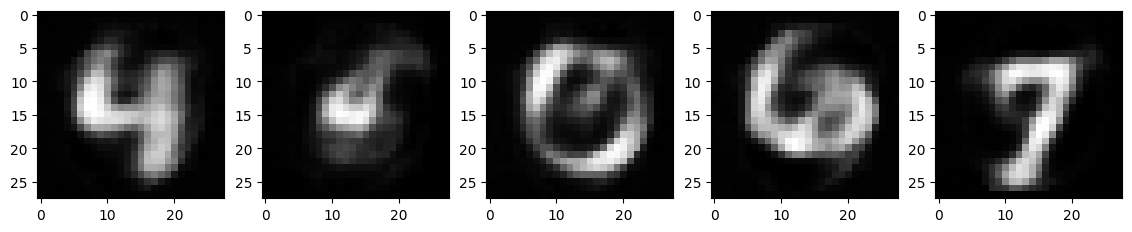

In [ ]:
#o/p image for Tr data passesd through 3 hidden layer autoencoder with 32 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_32_Tr[2288,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_32_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_32_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_32_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_32_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

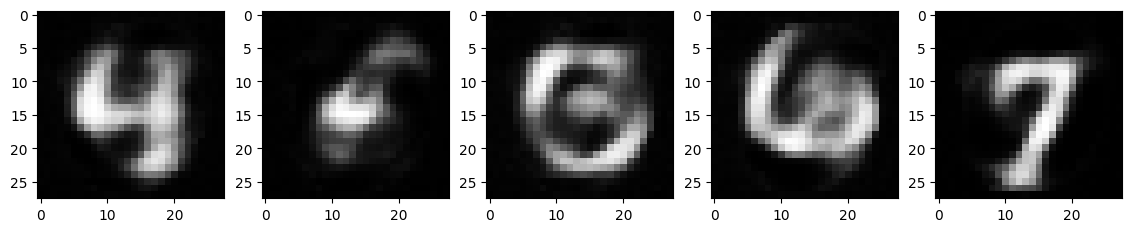

In [ ]:
#o/p image for Tr data passesd through 3 hidden layer autoencoder with 64 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_64_Tr[2288,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_64_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_64_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_64_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_64_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

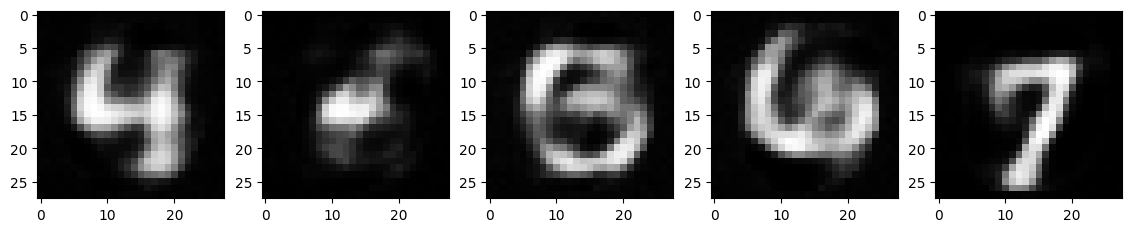

In [ ]:
#o/p image for Tr data passesd through 3 hidden layer autoencoder with 128 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_128_Tr[2288,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_128_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_128_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_128_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_128_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

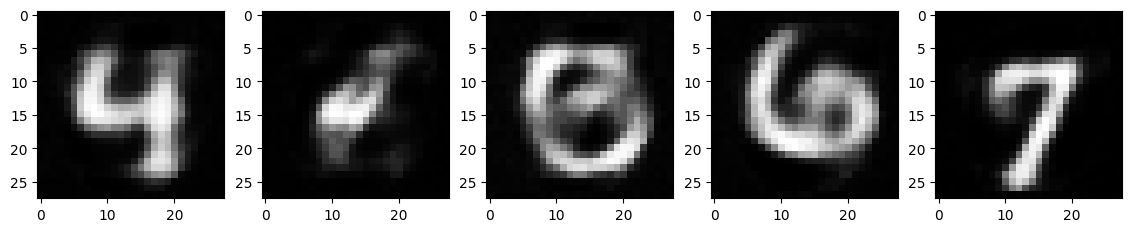

In [ ]:
#o/p image for Tr data passesd through 3 hidden layer autoencoder with 256 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_256_Tr[2288,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_256_Tr[2290,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_256_Tr[4564,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_256_Tr[6853,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_256_Tr[9130,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

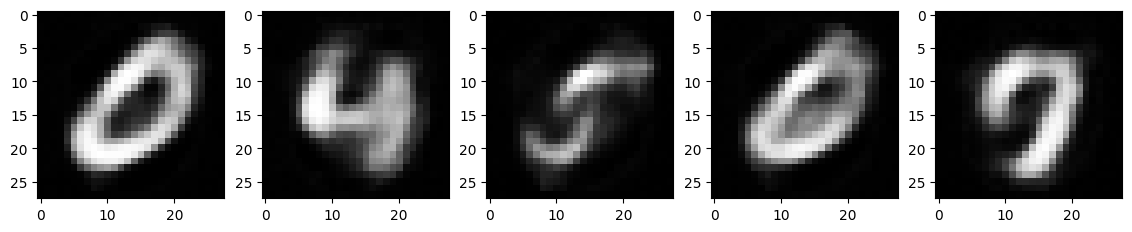

In [ ]:
#o/p image for Valdata passesd through 3 hidden layer autoencoder with 32 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_32_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_32_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_32_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_32_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_32_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

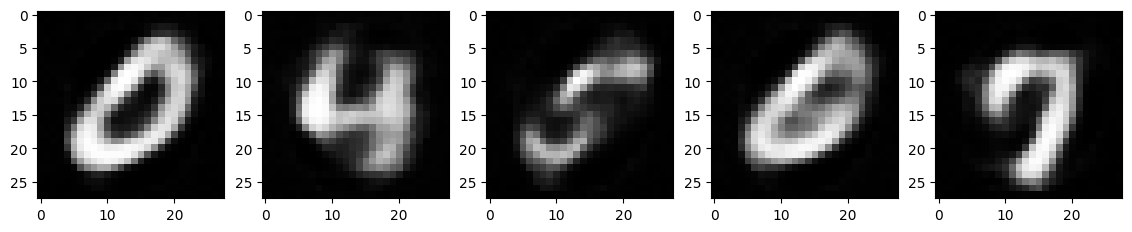

In [ ]:
#o/p image for Valdata passesd through 3 hidden layer autoencoder with 64 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_64_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_64_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_64_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_64_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_64_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

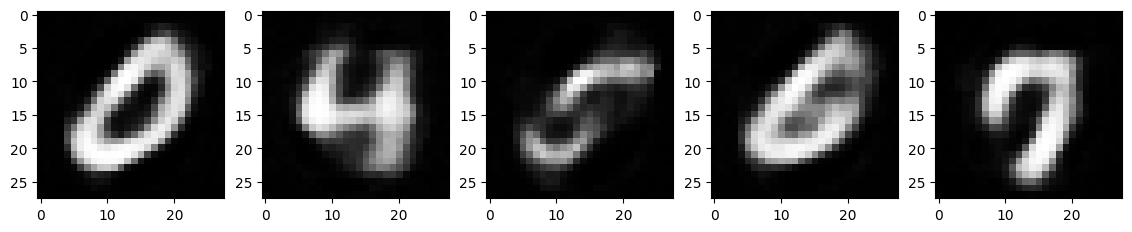

In [ ]:
#o/p image for Valdata passesd through 3 hidden layer autoencoder with 128 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_128_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_128_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_128_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_128_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_128_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

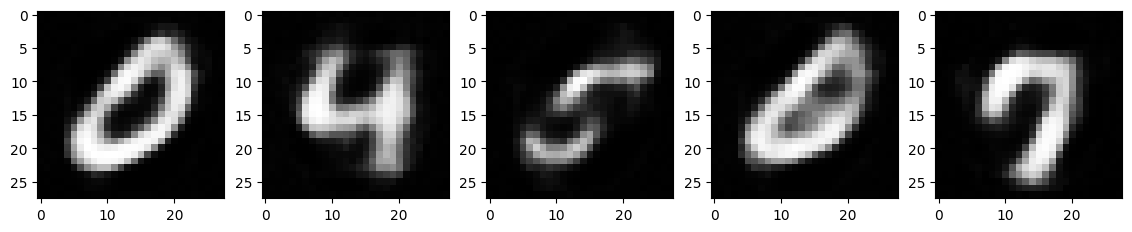

In [ ]:
#o/p image for Valdata passesd through 3 hidden layer autoencoder with 256 nodes in bottleneck layer
plt.figure(figsize=(14,14))
plt.subplot(1,5,1)


plt.imshow(predicted_Autoencoder_256_Val[1,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,2)


plt.imshow(predicted_Autoencoder_256_Val[780,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,5,3)


plt.imshow(predicted_Autoencoder_256_Val[1530,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,4)


plt.imshow(predicted_Autoencoder_256_Val[2290,:].reshape((28,28))*255.0,cmap="gray")
plt.subplot(1,5,5)


plt.imshow(predicted_Autoencoder_256_Val[3050,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

In [ ]:
print(trdic)
print(testdic)
print(valdic)

{'0': 2287, '4': 2277, '5': 2287, '6': 2277, '7': 2277}
{'0': 769, '4': 759, '5': 759, '6': 759, '7': 759}
{'0': 769, '4': 759, '5': 759, '6': 759, '7': 759}


In [ ]:
def showReconstructedImage(data,clas,indx,i):
  plt.subplot(1,5,i)
  plt.title("Reconstructed image for test data for 32 node for class {}".format(clas))

  plt.imshow(data[indx,:].reshape((28,28))*255.0,cmap="gray")
  

In [ ]:
# # for 32 node bottleneck layer reconstructed image from 3 hidden layer 
# for clas in [0,4,5,6,7]:
#   i=1
#   if clas==0:
#     indx=
#     showReconstructedImage(predicted_Autoencoder_32_Test,clas,indx,i)
#   if clas==4:
#     indx=
#     showReconstructedImage(predicted_Autoencoder_32_Test,clas,indx,i)
#   if clas==5:
#     indx=
#     showReconstructedImage(predicted_Autoencoder_32_Test,clas,indx,i)
#   if clas==6:
#     indx=
#     showReconstructedImage(predicted_Autoencoder_32_Test,clas,indx,i)
#   if clas==7:
#     indx=
#     showReconstructedImage(predicted_Autoencoder_32_Test,clas,indx,i)
#   i=i+1


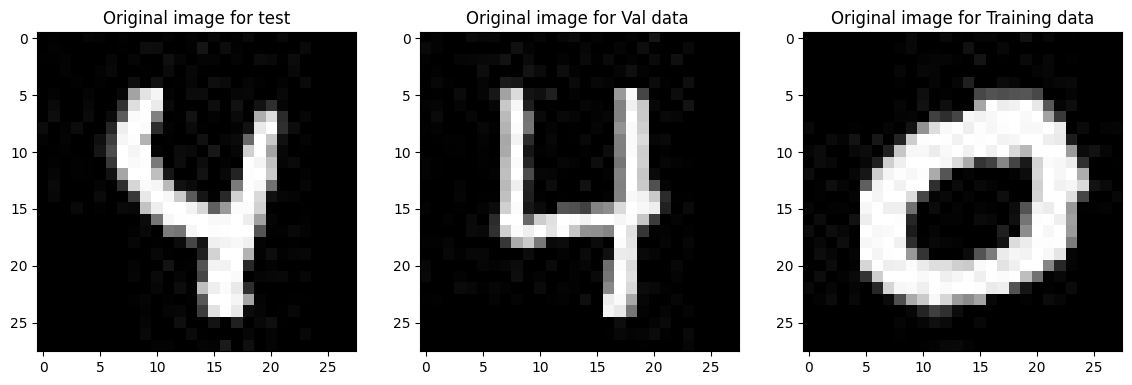

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Original image for test")

plt.imshow(TestDataFlatten[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Original image for Val data ")

plt.imshow(ValDataFlatten[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Original image for Training data")

plt.imshow(TrDataFlatten[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

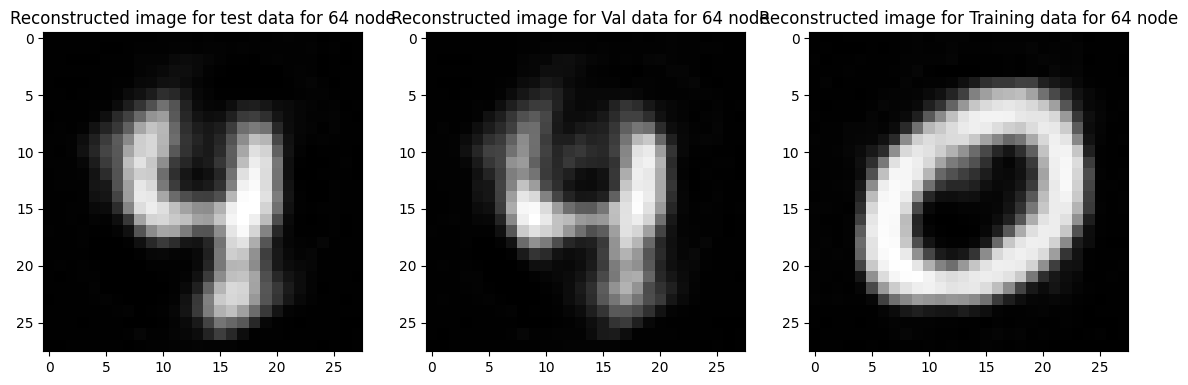

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data for 64 node")

plt.imshow(predicted_Autoencoder_64_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data for 64 node  ")

plt.imshow(predicted_Autoencoder_64_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data for 64 node")

plt.imshow(predicted_Autoencoder_64_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()




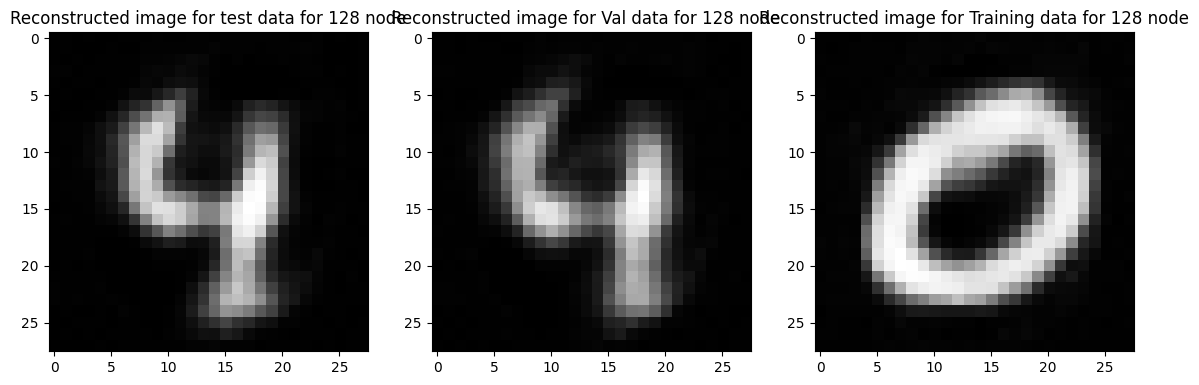

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data for 128 node")

plt.imshow(predicted_Autoencoder_128_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data for 128 node  ")

plt.imshow(predicted_Autoencoder_128_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data for 128 node")

plt.imshow(predicted_Autoencoder_128_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

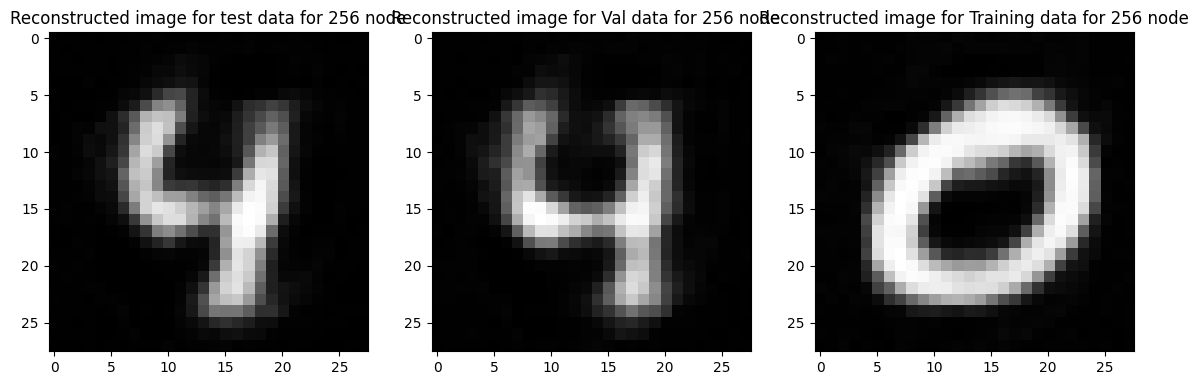

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title("Reconstructed image for test data for 256 node")

plt.imshow(predicted_Autoencoder_256_Test[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,2)
plt.title("Reconstructed image for Val data for 256 node  ")

plt.imshow(predicted_Autoencoder_256_Val[1000,:].reshape((28,28))*255.0,cmap="gray")

plt.subplot(1,3,3)
plt.title("Reconstructed image for Training data for 256 node")

plt.imshow(predicted_Autoencoder_256_Tr[1000,:].reshape((28,28))*255.0,cmap="gray")
plt.show()

Classifier for encoded data obtained from 3 hidden layer auto encoder

In [ ]:
classifier1_32_3layer= keras.Sequential(
    [
        Input(shape=(32,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier1_32_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_32_3layer = classifier1_32_3layer.fit(x=predicted_encoder_32_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_32_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 9ms/step - loss: 0.9938 - accuracy: 0.6349 - val_loss: 0.3416 - val_accuracy: 0.9041
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2844 - accuracy: 0.9113 - val_loss: 0.2622 - val_accuracy: 0.9143
Epoch 3/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2492 - accuracy: 0.9184 - val_loss: 0.2461 - val_accuracy: 0.9201
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.2203 - accuracy: 0.9294 - val_loss: 0.2347 - val_accuracy: 0.9261
Epoch 5/10000
229/229 [==============================] - 3s 15ms/step - loss: 0.2062 - accuracy: 0.9320 - val_loss: 0.1896 - val_accuracy: 0.9388
Epoch 6/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1913 - accuracy: 0.9373 - val_loss: 0.1852 - val_accuracy: 0.9403
Epoch 7/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1840 - accuracy: 0.9374 - val_loss: 0.1831 - val

In [ ]:
classifier1_64_3layer= keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier1_64_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_64_3layer = classifier1_64_3layer.fit(x=predicted_encoder_64_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_64_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 5s 15ms/step - loss: 0.7689 - accuracy: 0.7306 - val_loss: 0.2425 - val_accuracy: 0.9243
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.2165 - accuracy: 0.9294 - val_loss: 0.1911 - val_accuracy: 0.9367
Epoch 3/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1838 - accuracy: 0.9396 - val_loss: 0.1656 - val_accuracy: 0.9445
Epoch 4/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1679 - accuracy: 0.9455 - val_loss: 0.1522 - val_accuracy: 0.9498
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1508 - accuracy: 0.9518 - val_loss: 0.1459 - val_accuracy: 0.9519
Epoch 6/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1400 - accuracy: 0.9534 - val_loss: 0.1416 - val_accuracy: 0.9516
Epoch 7/10000
229/229 [==============================] - 3s 15ms/step - loss: 0.1335 - accuracy: 0.9543 - val_loss: 0.1318 - val_

In [ ]:
classifier1_128_3layer= keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier1_128_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_128_3layer = classifier1_128_3layer.fit(x=predicted_encoder_128_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_128_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 5s 16ms/step - loss: 0.6523 - accuracy: 0.7919 - val_loss: 0.2230 - val_accuracy: 0.9317
Epoch 2/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.1957 - accuracy: 0.9392 - val_loss: 0.2000 - val_accuracy: 0.9372
Epoch 3/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1650 - accuracy: 0.9460 - val_loss: 0.1661 - val_accuracy: 0.9443
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1428 - accuracy: 0.9534 - val_loss: 0.1400 - val_accuracy: 0.9548
Epoch 5/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1300 - accuracy: 0.9576 - val_loss: 0.1271 - val_accuracy: 0.9564
Epoch 6/10000
229/229 [==============================] - 3s 12ms/step - loss: 0.1181 - accuracy: 0.9598 - val_loss: 0.1068 - val_accuracy: 0.9622
Epoch 7/10000
229/229 [==============================] - 3s 15ms/step - loss: 0.1071 - accuracy: 0.9653 - val_loss: 0.0973 - 

In [ ]:
classifier1_256_3layer= keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier1_256_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_256_3layer = classifier1_256_3layer.fit(x=predicted_encoder_256_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_256_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 4s 14ms/step - loss: 0.5390 - accuracy: 0.8362 - val_loss: 0.1809 - val_accuracy: 0.9411
Epoch 2/10000
229/229 [==============================] - 3s 14ms/step - loss: 0.1646 - accuracy: 0.9474 - val_loss: 0.1412 - val_accuracy: 0.9540
Epoch 3/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1351 - accuracy: 0.9572 - val_loss: 0.1331 - val_accuracy: 0.9574
Epoch 4/10000
229/229 [==============================] - 2s 10ms/step - loss: 0.1091 - accuracy: 0.9641 - val_loss: 0.1110 - val_accuracy: 0.9622
Epoch 5/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.0930 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9719
Epoch 6/10000
229/229 [==============================] - 2s 9ms/step - loss: 0.0789 - accuracy: 0.9741 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 7/10000
229/229 [==============================] - 4s 17ms/step - loss: 0.0723 - accuracy: 0.9772 - val_loss: 0.0777 - v

Printing accuracy of classifier obtained from feeding data of different 3 layer autoencoder

In [ ]:
print("Accuracy for training data for 3 hidden layer 256 node:" ,classifier1_256_3layer.evaluate(x=predicted_encoder_256_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 256 node:",classifier1_256_3layer.evaluate(x=predicted_encoder_256_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 256 node:",classifier1_256_3layer.evaluate(x=predicted_encoder_256_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9872
Accuracy for training data for 3 hidden layer 256 node: 0.9871985912322998
119/119 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9829
Accuracy for test data for 3 hidden layer 256 node: 0.9829171895980835
119/119 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9806
Accuracy for val data for 3 hidden layer 256 node: 0.9805518984794617


In [ ]:
print("Accuracy for training data for 3 hidden layer 128 node:" ,classifier1_128_3layer.evaluate(x=predicted_encoder_128_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 128 node:",classifier1_128_3layer.evaluate(x=predicted_encoder_128_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 128 node:",classifier1_128_3layer.evaluate(x=predicted_encoder_128_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9711
Accuracy for training data for 3 hidden layer 128 node: 0.9710653424263
119/119 [==============================] - 1s 4ms/step - loss: 0.0981 - accuracy: 0.9679
Accuracy for test data for 3 hidden layer 128 node: 0.9679369330406189
119/119 [==============================] - 1s 4ms/step - loss: 0.0948 - accuracy: 0.9687
Accuracy for val data for 3 hidden layer 128 node: 0.9687253832817078


In [ ]:
print("Accuracy for training data for 3 hidden layer 64 node:" ,classifier1_64_3layer.evaluate(x=predicted_encoder_64_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 64 node:",classifier1_64_3layer.evaluate(x=predicted_encoder_64_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 64 node:",classifier1_64_3layer.evaluate(x=predicted_encoder_64_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 2s 4ms/step - loss: 0.0915 - accuracy: 0.9705
Accuracy for training data for 3 hidden layer 64 node: 0.9705392122268677
119/119 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9690
Accuracy for test data for 3 hidden layer 64 node: 0.9689881801605225
119/119 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9661
Accuracy for val data for 3 hidden layer 64 node: 0.9660972356796265


In [ ]:
print("Accuracy for training data for 3 hidden layer 32 node:" ,classifier1_32_3layer.evaluate(x=predicted_encoder_32_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 32 node:",classifier1_32_3layer.evaluate(x=predicted_encoder_32_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 32 node:",classifier1_32_3layer.evaluate(x=predicted_encoder_32_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.9262
Accuracy for training data for 3 hidden layer 32 node: 0.9261727333068848
119/119 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9275
Accuracy for test data for 3 hidden layer 32 node: 0.9274638891220093
119/119 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9243
Accuracy for val data for 3 hidden layer 32 node: 0.9243101477622986


In [ ]:
classifier2_32_3layer= keras.Sequential(
    [
        Input(shape=(32,)),
       
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2" ),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_32_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_32_3layer = classifier2_32_3layer.fit(x=predicted_encoder_32_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_32_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 2s 5ms/step - loss: 1.2333 - accuracy: 0.5497 - val_loss: 0.5416 - val_accuracy: 0.8386
Epoch 2/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8930 - val_loss: 0.2725 - val_accuracy: 0.9185
Epoch 3/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2645 - accuracy: 0.9186 - val_loss: 0.2375 - val_accuracy: 0.9251
Epoch 4/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9234 - val_loss: 0.2159 - val_accuracy: 0.9288
Epoch 5/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2168 - accuracy: 0.9292 - val_loss: 0.2116 - val_accuracy: 0.9288
Epoch 6/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2082 - accuracy: 0.9312 - val_loss: 0.1949 - val_accuracy: 0.9351
Epoch 7/10000
229/229 [==============================] - 1s 6ms/step - loss: 0.1962 - accuracy: 0.9353 - val_loss: 0.1857 - val_ac

In [ ]:
classifier2_64_3layer= keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2" ),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_64_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_64_3layer = classifier2_64_3layer.fit(x=predicted_encoder_64_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_64_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 8ms/step - loss: 1.0678 - accuracy: 0.6107 - val_loss: 0.3808 - val_accuracy: 0.9001
Epoch 2/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2783 - accuracy: 0.9186 - val_loss: 0.2171 - val_accuracy: 0.9356
Epoch 3/10000
229/229 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.9362 - val_loss: 0.1944 - val_accuracy: 0.9380
Epoch 4/10000
229/229 [==============================] - 1s 3ms/step - loss: 0.1820 - accuracy: 0.9427 - val_loss: 0.1765 - val_accuracy: 0.9443
Epoch 5/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.1685 - accuracy: 0.9463 - val_loss: 0.1533 - val_accuracy: 0.9516
Epoch 6/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.1584 - accuracy: 0.9477 - val_loss: 0.1424 - val_accuracy: 0.9532
Epoch 7/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.1434 - accuracy: 0.9539 - val_loss: 0.1319 - val_ac

In [ ]:
classifier2_128_3layer= keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2" ),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_128_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_128_3layer = classifier2_128_3layer.fit(x=predicted_encoder_128_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_128_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 3s 8ms/step - loss: 0.9700 - accuracy: 0.6732 - val_loss: 0.2966 - val_accuracy: 0.9206
Epoch 2/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.2282 - accuracy: 0.9349 - val_loss: 0.1885 - val_accuracy: 0.9443
Epoch 3/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.1743 - accuracy: 0.9464 - val_loss: 0.1638 - val_accuracy: 0.9490
Epoch 4/10000
229/229 [==============================] - 1s 6ms/step - loss: 0.1505 - accuracy: 0.9525 - val_loss: 0.1420 - val_accuracy: 0.9566
Epoch 5/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1318 - accuracy: 0.9578 - val_loss: 0.1267 - val_accuracy: 0.9606
Epoch 6/10000
229/229 [==============================] - 1s 6ms/step - loss: 0.1213 - accuracy: 0.9605 - val_loss: 0.1358 - val_accuracy: 0.9590
Epoch 7/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.1080 - accuracy: 0.9662 - val_loss: 0.1133 - val_ac

In [ ]:
classifier2_256_3layer= keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2" ),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]

classifier2_256_3layer.compile(optimizer=Adam2,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history_256_3layer = classifier2_256_3layer.fit(x=predicted_encoder_256_Tr,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(predicted_encoder_256_Val,ValLabel),shuffle=True,validation_batch_size=50,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
229/229 [==============================] - 2s 5ms/step - loss: 0.7618 - accuracy: 0.7555 - val_loss: 0.2416 - val_accuracy: 0.9327
Epoch 2/10000
229/229 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9431 - val_loss: 0.1859 - val_accuracy: 0.9427
Epoch 3/10000
229/229 [==============================] - 1s 6ms/step - loss: 0.1494 - accuracy: 0.9532 - val_loss: 0.1557 - val_accuracy: 0.9464
Epoch 4/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1256 - accuracy: 0.9587 - val_loss: 0.1223 - val_accuracy: 0.9606
Epoch 5/10000
229/229 [==============================] - 2s 7ms/step - loss: 0.1036 - accuracy: 0.9685 - val_loss: 0.0971 - val_accuracy: 0.9690
Epoch 6/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0859 - val_accuracy: 0.9756
Epoch 7/10000
229/229 [==============================] - 1s 5ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0813 - val_ac

In [ ]:
print("Accuracy for training data for 3 hidden layer 256 node:" ,classifier2_256_3layer.evaluate(x=predicted_encoder_256_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 256 node:",classifier2_256_3layer.evaluate(x=predicted_encoder_256_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 256 node:",classifier2_256_3layer.evaluate(x=predicted_encoder_256_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9863
Accuracy for training data for 3 hidden layer 256 node: 0.9863218069076538
119/119 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9798
Accuracy for test data for 3 hidden layer 256 node: 0.9797634482383728
119/119 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9806
Accuracy for val data for 3 hidden layer 256 node: 0.9805518984794617


In [ ]:
print("Accuracy for training data for 3 hidden layer 128 node:" ,classifier2_128_3layer.evaluate(x=predicted_encoder_128_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 128 node:",classifier2_128_3layer.evaluate(x=predicted_encoder_128_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 128 node:",classifier2_128_3layer.evaluate(x=predicted_encoder_128_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 1s 4ms/step - loss: 0.0735 - accuracy: 0.9766
Accuracy for training data for 3 hidden layer 128 node: 0.9765892028808594
119/119 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9782
Accuracy for test data for 3 hidden layer 128 node: 0.9781866073608398
119/119 [==============================] - 1s 4ms/step - loss: 0.0814 - accuracy: 0.9737
Accuracy for val data for 3 hidden layer 128 node: 0.9737187623977661


In [ ]:
print("Accuracy for training data for 3 hidden layer 64 node:" ,classifier2_64_3layer.evaluate(x=predicted_encoder_64_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 64 node:",classifier2_64_3layer.evaluate(x=predicted_encoder_64_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 64 node:",classifier2_64_3layer.evaluate(x=predicted_encoder_64_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 3s 7ms/step - loss: 0.0757 - accuracy: 0.9768
Accuracy for training data for 3 hidden layer 64 node: 0.9767645597457886
119/119 [==============================] - 2s 14ms/step - loss: 0.0781 - accuracy: 0.9763
Accuracy for test data for 3 hidden layer 64 node: 0.9763469099998474
119/119 [==============================] - 1s 8ms/step - loss: 0.0802 - accuracy: 0.9729
Accuracy for val data for 3 hidden layer 64 node: 0.972930371761322


In [ ]:
print("Accuracy for training data for 3 hidden layer 32 node:" ,classifier2_32_3layer.evaluate(x=predicted_encoder_32_Tr, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for test data for 3 hidden layer 32 node:",classifier2_32_3layer.evaluate(x=predicted_encoder_32_Test, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)[1])
print("Accuracy for val data for 3 hidden layer 32 node:",classifier2_32_3layer.evaluate(x=predicted_encoder_32_Val, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)[1])

357/357 [==============================] - 4s 10ms/step - loss: 0.1293 - accuracy: 0.9577
Accuracy for training data for 3 hidden layer 32 node: 0.9576501250267029
119/119 [==============================] - 1s 7ms/step - loss: 0.1265 - accuracy: 0.9603
Accuracy for test data for 3 hidden layer 32 node: 0.9603153467178345
119/119 [==============================] - 1s 7ms/step - loss: 0.1394 - accuracy: 0.9524
Accuracy for val data for 3 hidden layer 32 node: 0.9524310231208801


In [ ]:
pTest3=classifier2_256_3layer.predict(predicted_encoder_256_Test)

119/119 [==============================] - 1s 5ms/step


In [ ]:
test3=[]
test3label=[]
for i in range(TestDataFlatten.shape[0]):
  test3.append(np.argmax(pTest3[i,:]))
  test3label.append(np.argmax(TestLabel[i,:]))

In [ ]:
print(sklearn.metrics.confusion_matrix(test3label,test3))

[[761   1   0   3   4]
 [  1 730   2   6  20]
 [  5   0 741   9   4]
 [  4   0   8 747   0]
 [  3   1   5   1 749]]
